# Package Import

In [1]:
import dask.dataframe as dd
import os
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import locale

In [2]:
path = 'C:/Eigene Dateien/Masterarbeit/FraudDetection/Daten/tx_out_filesplit/'
os.chdir(path)

# Read data, check nulls, upsample and encode

In [3]:
df = dd.read_parquet('final_data_set_610682-663904')
df = df.set_index('address')
df_illicit = df[df['illicit'] == 1]
df_licit = df[df['illicit'] == 0]
df.head()

C:\Anaconda\anaconda3\envs\fraud\lib\site-packages\dask\dataframe\shuffle.py:93: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mins = mins.fillna(method="bfill")
C:\Anaconda\anaconda3\envs\fraud\lib\site-packages\dask\dataframe\shuffle.py:94: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  maxes = maxes.fillna(method="bfill")


count_addresses  count_addresses_sender  \
address                                                                       
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                3                       2   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ              271                       2   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                7                       2   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                6                       3   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt             2424                     303   

                                    count_addresses_receiver  \
address                                                        
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                         2   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                       269   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                         6   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                         4   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                      2148   

                                    count_transactions  \
address                                                  
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                   2   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                   2   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                   2   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                   2   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                 118   

                                    count_transactions_sender  \
address                                                         
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                        1.0   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                        NaN   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                        1.0   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                        1.0   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                       51.0   

                                    count_transactions_receiver  \
address                                                           
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                            1   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                            2   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                            1   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                            1   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                           67   

                                    count_transactions_s_equal_r  \
address                                                            
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                           0.0   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                           NaN   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                           0.0   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                           0.0   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                           0.0   

                                    darknet_markets  lifetime  \
address                                                         
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX             61.0         1   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ             54.1         6   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY             59.0         1   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4             42.5        91   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt             42.9       151   

                                    min_transaction_value  ...  \
address                                                    ...   
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX               0.013723  ...   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ               0.000007  ...   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY               0.193508  ...   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4               0.000026  ...   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt               0.000090  ...   

                                    mean_transactions_fee  \
address                                                     
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX               0.000042   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ               0.000046   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY               0.000022   

Check if null values

In [4]:
df_is_null = df.isnull().sum().reset_index()
df_is_null = df_is_null[df_is_null[0] > 0]
df_is_null = df_is_null.rename(columns = {'index': 'feature is null', 0: 'count'})
df_is_null.compute()

feature is null   count
4                count_transactions_sender   16510
6             count_transactions_s_equal_r   16510
11                   std_transaction_value   14946
12            min_transaction_value_sender   16510
13            max_transaction_value_sender   16510
14            std_transaction_value_sender  239719
17          std_transaction_value_receiver  236633
19                             std_balance   14851
23    std_addresses_per_transaction_sender   14837
27  std_addresses_per_transaction_receiver   14837
31           std_addresses_per_transaction   14837
33           transaction_volume_sender_btc   16510
36          transaction_volume_sender_euro   16510
39                  transaction_fee_sender   16510
41              mean_time_diff_transaction   14837
42               std_time_diff_transaction  237273
43       mean_time_diff_transaction_sender  239635
44        std_time_diff_transaction_sender  250474
45     mean_time_diff_transaction_receiver  236532
46      std_time_diff_transaction_receiver  248931
48                mean_transactions_sender   16510
50             mean_transactions_s_equal_r   16511
52            mean_transactions_fee_sender   16510
55         mean_transactions_volume_sender   16510
58          concentration_addresses_sender   16510

Closer look to the feature count_transactions_sender is null values. To make assumptions to other features. (Left: count_transactions_sender feature columns Right: original dataframe)

In [4]:
df_is_null_1 = df[df['count_transactions_sender'].isnull()].isnull().sum().reset_index()
df_is_null_1 = dd.concat([df_is_null_1[df_is_null_1[0] > 0], df_is_null], axis = 1)
df_is_null_1.compute()

NameError: name 'df_is_null' is not defined

The null values appeared because of missing sender transactions. Therefore a imputation with 0 is suitable.

In [6]:
df_is_null_1[df_is_null_1['index'].str.contains('sender')].compute()

index      0  \
4              count_transactions_sender  16510   
12          min_transaction_value_sender  16510   
13          max_transaction_value_sender  16510   
14          std_transaction_value_sender  16510   
23  std_addresses_per_transaction_sender  14837   
33         transaction_volume_sender_btc  16510   
36        transaction_volume_sender_euro  16510   
39                transaction_fee_sender  16510   
43     mean_time_diff_transaction_sender  16510   
44      std_time_diff_transaction_sender  16510   
48              mean_transactions_sender  16510   
52          mean_transactions_fee_sender  16510   
55       mean_transactions_volume_sender  16510   
58        concentration_addresses_sender  16510   

                         feature is null   count  
4              count_transactions_sender   16510  
12          min_transaction_value_sender   16510  
13          max_transaction_value_sender   16510  
14          std_transaction_value_sender  239719  
23  std_addresses_per_transaction_sender   14837  
33         transaction_volume_sender_btc   16510  
36        transaction_volume_sender_euro   16510  
39                transaction_fee_sender   16510  
43     mean_time_diff_transaction_sender  239635  
44      std_time_diff_transaction_sender  250474  
48              mean_transactions_sender   16510  
52          mean_transactions_fee_sender   16510  
55       mean_transactions_volume_sender   16510  
58        concentration_addresses_sender   16510

In [7]:
df_is_null_1[~df_is_null_1['index'].str.contains('sender')].compute()

index      0  \
6             count_transactions_s_equal_r  16510   
11                   std_transaction_value  14851   
17          std_transaction_value_receiver  14851   
19                             std_balance  14848   
27  std_addresses_per_transaction_receiver  14837   
31           std_addresses_per_transaction  14837   
41              mean_time_diff_transaction  14837   
42               std_time_diff_transaction  15578   
45     mean_time_diff_transaction_receiver  14837   
46      std_time_diff_transaction_receiver  15578   
50             mean_transactions_s_equal_r  16510   

                           feature is null   count  
6             count_transactions_s_equal_r   16510  
11                   std_transaction_value   14946  
17          std_transaction_value_receiver  236633  
19                             std_balance   14851  
27  std_addresses_per_transaction_receiver   14837  
31           std_addresses_per_transaction   14837  
41              mean_time_diff_transaction   14837  
42               std_time_diff_transaction  237273  
45     mean_time_diff_transaction_receiver  236532  
46      std_time_diff_transaction_receiver  248931  
50             mean_transactions_s_equal_r   16511

"count_transactions_s_equal_r" and "mean_transactions_s_equal_r" compare sender and receiver. If there are no senders, there is nothing to compare. Therefore 0 is imputed.

In [8]:
rest_isnull = df_is_null[~(df_is_null_1['index'].str.contains('sender') | df_is_null_1['index'].str.contains('s_equal_r'))]
rest_isnull.compute()

feature is null   count
11                   std_transaction_value   14946
17          std_transaction_value_receiver  236633
19                             std_balance   14851
27  std_addresses_per_transaction_receiver   14837
31           std_addresses_per_transaction   14837
41              mean_time_diff_transaction   14837
42               std_time_diff_transaction  237273
45     mean_time_diff_transaction_receiver  236532
46      std_time_diff_transaction_receiver  248931

'time_diff' can be nan if there is only one transaction. Same is if the standard deviation is calculated but there is only one transaction (correction term of the standard deviation n-1 results in 0 division). Therefore std_transaction_value, std_balance, std_addresses_per_transaction_receiver, std_addresses_per_transaction and mean_time_diff_transaction can be imputed with 0

In [9]:
(df[df['std_transaction_value'].isnull()]['count_transactions'] == 1).sum().compute()

14837

The same problem with receiver transactions which are 0. Therefore std_transaction_value_receiver, mean_time_diff_transaction_receiver and std_time_diff_transaction_receiver can be imputed with 0.

In [10]:
(df[df['std_transaction_value_receiver'].isnull()]['count_transactions_receiver'] == 1).sum().compute()

236536

In [11]:
df[df['std_transaction_value_receiver'].isnull()][['count_transactions_receiver', 'std_transaction_value_receiver']].head()

count_transactions_receiver  \
address                                                           
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                            1   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                            1   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                            1   
1124Vc7iWXAWYjJqexhwi2oxMnbfxppvRd                            1   
1125oHW3KCah1esMomGda4kPqLYcQcfmfT                            1   

                                    std_transaction_value_receiver  
address                                                             
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                             NaN  
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                             NaN  
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                             NaN  
1124Vc7iWXAWYjJqexhwi2oxMnbfxppvRd                             NaN  
1125oHW3KCah1esMomGda4kPqLYcQcfmfT                             NaN

In [12]:
df[((df['std_transaction_value_receiver'].isnull()) & (df['std_transaction_value_receiver'] > 1))].compute()

Empty DataFrame
Columns: [count_addresses, count_addresses_sender, count_addresses_receiver, count_transactions, count_transactions_sender, count_transactions_receiver, count_transactions_s_equal_r, darknet_markets, lifetime, min_transaction_value, max_transaction_value, std_transaction_value, min_transaction_value_sender, max_transaction_value_sender, std_transaction_value_sender, min_transaction_value_receiver, max_transaction_value_receiver, std_transaction_value_receiver, mean_balance, std_balance, mean_addresses_per_transaction_sender, min_addresses_per_transaction_sender, max_addresses_per_transaction_sender, std_addresses_per_transaction_sender, mean_addresses_per_transaction_receiver, min_addresses_per_transaction_receiver, max_addresses_perr_transaction_receiver, std_addresses_per_transaction_receiver, mean_addresses_per_transaction, min_addresses_per_transaction, max_addresses_per_transaction, std_addresses_per_transaction, transaction_volume_btc, transaction_volume_sender_btc, transaction_volume_receiver_btc, transaction_volume_euro, transaction_volume_sender_euro, transaction_volume_receiver_euro, transaction_fee, transaction_fee_sender, transaction_fee_receiver, mean_time_diff_transaction, std_time_diff_transaction, mean_time_diff_transaction_sender, std_time_diff_transaction_sender, mean_time_diff_transaction_receiver, std_time_diff_transaction_receiver, mean_transactions, mean_transactions_sender, mean_transactions_receiver, mean_transactions_s_equal_r, mean_transactions_fee, mean_transactions_fee_sender, mean_transactions_fee_receiver, mean_transactions_volume, mean_transactions_volume_sender, mean_transactions_volume_receiver, concentration_addresses, concentration_addresses_sender, concentration_addresses_receiver, illicit]
Index: []

[0 rows x 61 columns]

Conclusion to null-values: mostly a result of no transactions in this category or only one transaction. Therefore imputation of 0 for null values is suggested. As well the data check showed that lifetime is for two entries 0. This shouldn't be as the lifetime is always above 0. Therefore 1 is imputed. To avoid infinite values in the mean transactions columns, the mean has to be computed again (with no 0 in lifetime).

In [7]:
df = df.fillna(0)
df = df.replace(float('inf'), 0)
df['lifetime'] = df['lifetime'].replace(0, 1)
df['mean_transactions'] = df['count_transactions'] / df['lifetime']
df['mean_transactions_sender'] = df['count_transactions_sender'] / df['lifetime']
df['mean_transactions_receiver'] = df['count_transactions_receiver'] / df['lifetime']
df_illicit = df[df['illicit'] == 1]
df_licit = df[df['illicit'] == 0]

In [8]:
df_is_null_2 = df.isnull().sum()
df_is_null_2 = df_is_null_2.reset_index()
df_is_null_2 = df_is_null_2[df_is_null_2[0] > 0]
df_is_null_2.compute()

Empty DataFrame
Columns: [index, 0]
Index: []

Upsample (4,6108 x 16.581 = 62.528 = 20 % von (250.578 legale + 62.528 illegale Adressen))

In [9]:
df_illicit = df_illicit.sample(frac = 4.6108,
                               replace = True,
                               random_state = 190)

Check if upsampled data contains all illicit addresses. The sample method doesn't gurantee for it. Therefore the missing entries were added manually.

In [41]:
len(df[df['illicit'] == 1].index.unique())

13561

In [42]:
len(df_illicit.index.unique())

13447

In [43]:
len(df_illicit.index)

62493

In [10]:
index_df = df_illicit.index.unique().compute()
df_1 = df[df['illicit'] == 1].compute()
df_1 = df_1[~df_1.index.isin(index_df)]

In [11]:
df_ml = dd.concat([df_licit, df_illicit, df_1], axis = 0).compute()
len(df_ml.index.unique())

264139

In [84]:
len(df_ml.index)

313185

In [12]:
df = df.compute()

Describe data

In [13]:
described_data = df_ml.describe()
described_data.to_excel('described_features.xlsx')
described_data = df_ml[df_ml['illicit'] == 0].describe()
described_data.to_excel('described_features_licit.xlsx')
described_data = df_ml[df_ml['illicit'] == 1].describe()
described_data.to_excel('described_features_illicit.xlsx')

Encoding

In [13]:
num_attribs = df_ml.columns
num_attribs = num_attribs.to_list()
num_attribs = [i for i in num_attribs if i != 'illicit' ]
num_attribs

['count_addresses',
 'count_addresses_sender',
 'count_addresses_receiver',
 'count_transactions',
 'count_transactions_sender',
 'count_transactions_receiver',
 'count_transactions_s_equal_r',
 'darknet_markets',
 'lifetime',
 'min_transaction_value',
 'max_transaction_value',
 'std_transaction_value',
 'min_transaction_value_sender',
 'max_transaction_value_sender',
 'std_transaction_value_sender',
 'min_transaction_value_receiver',
 'max_transaction_value_receiver',
 'std_transaction_value_receiver',
 'mean_balance',
 'std_balance',
 'mean_addresses_per_transaction_sender',
 'min_addresses_per_transaction_sender',
 'max_addresses_per_transaction_sender',
 'std_addresses_per_transaction_sender',
 'mean_addresses_per_transaction_receiver',
 'min_addresses_per_transaction_receiver',
 'max_addresses_perr_transaction_receiver',
 'std_addresses_per_transaction_receiver',
 'mean_addresses_per_transaction',
 'min_addresses_per_transaction',
 'max_addresses_per_transaction',
 'std_addresses_

In [14]:
num_pipeline = make_pipeline(StandardScaler())

preprocessing = make_column_transformer((num_pipeline, num_attribs), 
                                        remainder = 'passthrough',
                                        verbose_feature_names_out = False).set_output(transform="pandas")

df_encoded = preprocessing.fit_transform(df)
df_encoded.head()

count_addresses  count_addresses_sender  \
address                                                                       
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX        -0.032959               -0.052018   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ        -0.002980               -0.052018   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY        -0.032512               -0.052018   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4        -0.032624               -0.051682   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt         0.237861                0.049164   

                                    count_addresses_receiver  \
address                                                        
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                 -0.020982   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                  0.018248   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                 -0.020394   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                 -0.020688   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                  0.294322   

                                    count_transactions  \
address                                                  
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX           -0.014298   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ           -0.014298   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY           -0.014298   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4           -0.014298   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt            0.147631   

                                    count_transactions_sender  \
address                                                         
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                  -0.010530   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                  -0.012749   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                  -0.010530   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                  -0.010530   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                   0.100445   

                                    count_transactions_receiver  \
address                                                           
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                    -0.013547   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                    -0.011934   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                    -0.013547   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                    -0.013547   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                     0.092918   

                                    count_transactions_s_equal_r  \
address                                                            
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                       -0.0069   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                       -0.0069   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                       -0.0069   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                       -0.0069   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                       -0.0069   

                                    darknet_markets  lifetime  \
address                                                         
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX         1.652807 -0.301865   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ         0.740361 -0.182441   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY         1.388330 -0.301865   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4        -0.793605  1.847768   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt        -0.740709  3.280857   

                                    min_transaction_value  ...  \
address                                                    ...   
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX              -0.036606  ...   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ              -0.037414  ...   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY              -0.026008  ...   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4              -0.037413  ...   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt              -0.037410  ...   

                                    mean_transactions_fee  \
address                                                     
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX               0.004974   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ               0.004975   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY               0.004974   

In [15]:
df_encoded_upsample = preprocessing.fit_transform(df_ml)
df_encoded_upsample.head()

count_addresses  count_addresses_sender  \
address                                                                       
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX        -0.041051               -0.050364   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ        -0.025146               -0.050364   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY        -0.040814               -0.050364   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4        -0.040873               -0.050178   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt         0.102632                0.005614   

                                    count_addresses_receiver  \
address                                                        
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                 -0.032882   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                 -0.012434   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                 -0.032576   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                 -0.032729   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                  0.131464   

                                    count_transactions  \
address                                                  
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX           -0.027903   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ           -0.027903   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY           -0.027903   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4           -0.027903   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt            0.064355   

                                    count_transactions_sender  \
address                                                         
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                  -0.022816   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                  -0.024252   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                  -0.022816   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                  -0.022816   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                   0.048996   

                                    count_transactions_receiver  \
address                                                           
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                    -0.027059   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                    -0.026120   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                    -0.027059   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                    -0.027059   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                     0.034923   

                                    count_transactions_s_equal_r  \
address                                                            
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX                     -0.015357   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ                     -0.015357   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY                     -0.015357   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4                     -0.015357   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt                     -0.015357   

                                    darknet_markets  lifetime  \
address                                                         
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX         1.681450 -0.327157   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ         0.760488 -0.239049   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY         1.414504 -0.327157   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4        -0.787796  1.258782   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt        -0.734407  2.316075   

                                    min_transaction_value  ...  \
address                                                    ...   
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX              -0.028029  ...   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ              -0.028649  ...   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY              -0.019900  ...   
11239Kbtbp9v6iQa7NhFFiZ4ByhKLwThq4              -0.028648  ...   
1123LLCPfHznjsYh4exJbkyiUAfkC7pbAt              -0.028645  ...   

                                    mean_transactions_fee  \
address                                                     
1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX               0.009124   
1122LfQRzJdC31Tw9h8XyBRqT7QUM9yKrZ               0.009124   
1122Mgd8GnaBcBv6gJ5QcvKt76GqGsRvjY               0.009124   

# General

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264139 entries, 1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX to bc1qzzzgwrke43x97tsztw8cr3r4rg4cyp5msnygrh
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   count_addresses                          264139 non-null  int64  
 1   count_addresses_sender                   264139 non-null  int64  
 2   count_addresses_receiver                 264139 non-null  int64  
 3   count_transactions                       264139 non-null  int64  
 4   count_transactions_sender                264139 non-null  float64
 5   count_transactions_receiver              264139 non-null  int64  
 6   count_transactions_s_equal_r             264139 non-null  float64
 7   darknet_markets                          264139 non-null  float64
 8   lifetime                                 264139 non-null  int64  
 9   min_transaction_value                  

In [113]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313185 entries, 1121fvgKUFNeBmVSLLcPaNS8TtWn4GrZdX to 3QsLNUptraBrHt8SPgHRZkYHcBuigtADcg
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   count_addresses                          313185 non-null  int64  
 1   count_addresses_sender                   313185 non-null  int64  
 2   count_addresses_receiver                 313185 non-null  int64  
 3   count_transactions                       313185 non-null  int64  
 4   count_transactions_sender                313185 non-null  float64
 5   count_transactions_receiver              313185 non-null  int64  
 6   count_transactions_s_equal_r             313185 non-null  float64
 7   darknet_markets                          313185 non-null  float64
 8   lifetime                                 313185 non-null  int64  
 9   min_transaction_value                    313185

# Boxplots

In [16]:
def plot_boxplot(data_upsampled, data, x, features_names_dict, yachse):
    '''
    This function plots numerical and continious data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot

    Returns:
    None, but prints the plots.
    '''
    #binwidth = np.round((np.max(data_upsampled[x]) - np.min(data_upsampled[x])) * ((len(data_upsampled[x]) ** (1/3))) / (3.49 * np.std(data_upsampled[x])))
    #binwidth = int(binwidth)
    locale.setlocale(locale.LC_ALL, 'de_DE')
    data_upsampled['illicit'] = data_upsampled['illicit'].replace(0, 'legale').replace(1, 'illegale')
    data['illicit'] = data['illicit'].replace(0, 'legale').replace(1, 'illegale')
    fig, ax = plt.subplots(1,2, figsize = (5,5), sharex = True, sharey = True)
    medianprops = dict(linestyle='-', linewidth=2.5, color='black')
    #meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='black')
    dict_font_subtitles = {'fontsize': 12, 'fontweight': 'bold', 'family': 'Arial'}
    sns.set(style="whitegrid")
    sns.boxplot(data_upsampled,
                orient = 'v',
                x = 'illicit',
                y = x,
                ax = ax[0],
                #showmeans=True,
                palette = 'Greys',
                medianprops = medianprops,
                #meanprops = meanpointprops,
                showfliers = False)
    sns.boxplot(data,
                orient = 'v',
                x = 'illicit',
                y = x,
                ax = ax[1],
                #showmeans=True,
                palette = 'Greys',
                medianprops = medianprops,
                #meanprops = meanpointprops,
                showfliers = False)
    ax[0].set_title('Datenset Upsampling', fontdict = dict_font_subtitles)
    ax[1].set_title('Ursprüngliches Datenset', fontdict = dict_font_subtitles)
    fig.suptitle(features_names_dict[x], weight = 'bold', size = 14, family = 'Arial')
    ax[0].set_xlabel('')
    ax[1].set_xlabel('')
    ax[0].set_ylabel(yachse[x], fontdict = dict_font_subtitles)
    ax[1].set_ylabel('')
    ax[0].ticklabel_format(axis = 'y', style = 'plain', useLocale = True)
    ax[0].tick_params(axis='both', colors='black')
    ax[1].tick_params(axis='both', colors='black')
    fig.supxlabel('Addresse', weight = 'bold', size = 12, family = 'Arial')
    plt.savefig(f'plots/upsampling/boxplots_{x}.pdf', format='pdf', bbox_inches='tight')

In [17]:
feature_names_dict = {'count_addresses': 'Anzahl der Adressen',
                      'count_addresses_sender': 'Anzahl der Adressen als Sender',
                      'count_addresses_receiver': 'Anzahl der Adressen als Empfänger',
                      'count_transactions': 'Anzahl der Transaktionen',
                      'count_transactions_sender': 'Anzahl der Transaktionen als Sender',
                      'count_transactions_receiver': 'Anzahl der Transaktionen als Empfänger', 
                      'count_transactions_s_equal_r': 'Anzahl der Transaktionen Sender gleich Empfänger',
                      'darknet_markets': 'Durchschnittlich aktive DarkNet Marktplätze', 
                      'lifetime': 'Lebenszeit der Adresse', 
                      'min_transaction_value': 'Minimaler Transaktionswert',
                      'max_transaction_value': 'Maximaler Transaktionswert', 
                      'std_transaction_value': 'Standardabweichung Transaktionsvolumen',
                      'min_transaction_value_sender': 'Minimaler Transaktionswert als Sender', 
                      'max_transaction_value_sender': 'Maximaler Transaktionswert als Sender',
                      'std_transaction_value_sender': 'Standardabweichung Transaktionsvolumen als Sender', 
                      'min_transaction_value_receiver': 'Minimaler Transaktionswert als Empfänger',
                      'max_transaction_value_receiver': 'Maximaler Transaktionswert als Empfänger', 
                      'std_transaction_value_receiver': 'Standardabweichung Transaktionsvolumen als Empfänger',
                      'mean_balance': 'Durchschnittlicher Kontostand in Bitcoins', 
                      'std_balance': 'Standardabweichung des Kontostands in Bitcoins', 
                      'mean_addresses_per_transaction_sender': 'Durchschnittliche Anzahl an Adressen pro Transaktion als Sender',
                      'min_addresses_per_transaction_sender': 'Minimale Anzahl an Adressen pro Transaktion als Sender',
                      'max_addresses_per_transaction_sender': 'Maximale Anzahl an Adressen pro Transaktion als Sender',
                      'std_addresses_per_transaction_sender': 'Standardabweichung der Anzahl an Adressen pro Transaktion als Sender',
                      'mean_addresses_per_transaction_receiver': 'Durchschnittliche Anzahl an Adressen pro Transaktion als Empfänger',
                      'min_addresses_per_transaction_receiver': 'Minimale Anzahl an Adressen pro Transaktion als Empfänger',
                      'max_addresses_perr_transaction_receiver': 'Maximale Anzahl an Adressen pro Transaktion als Empfänger',
                      'std_addresses_per_transaction_receiver': 'Standardabweichung der Anzahl an Adressen pro Transaktion als Empfänger',
                      'mean_addresses_per_transaction': 'Durchschnittliche Anzahl an Adressen pro Transaktion', 
                      'min_addresses_per_transaction': 'Minimale Anzahl an Adressen pro Transaktion',
                      'max_addresses_per_transaction': 'Maximale Anzahl an Adressen pro Transaktion', 
                      'std_addresses_per_transaction': 'Standardabweichung der Anzahl an Adressen pro Transaktion',
                      'transaction_volume_btc': 'Transaktionsvolumen in Bitcoins', 
                      'transaction_volume_sender_btc': 'Transaktionsvolumen in Bitcoins als Sender',
                      'transaction_volume_receiver_btc': 'Transaktionsvolumen in Bitcoins als Empfänger', 
                      'transaction_volume_euro': 'Transaktionsvolumen in Euro',
                      'transaction_volume_sender_euro': 'Transaktionsvolumen in Euro als Sender', 
                      'transaction_volume_receiver_euro': 'Transaktionsvolumen in Euro als Empfänger',
                      'transaction_fee': 'Gesamtwert der Transaktionsgebühren', 
                      'transaction_fee_sender': 'Gesamtwert der Transaktionsgebühren als Sender', 
                      'transaction_fee_receiver': 'Gesamtwert der Transaktionsgebühren als Empfänger',
                      'mean_time_diff_transaction': 'Durchschnittliche Zeit zwischen Transaktionen', 
                      'std_time_diff_transaction': 'Standardabweichung der Zeit zwischen Transaktionen',
                      'mean_time_diff_transaction_sender': 'Durchschnittliche Zeit zwischen Transaktionen als Sender', 
                      'std_time_diff_transaction_sender': 'Standardabweichung der Zeit zwischen Transaktionen als Sender',
                      'mean_time_diff_transaction_receiver': 'Durchschnittliche Zeit zwischen Transaktionen als Empfänger',
                      'std_time_diff_transaction_receiver': 'Standardabweichung der Zeit zwischen Transaktionen als Empfänger', 
                      'mean_transactions': 'Durchschnittliche Anzahl der Transaktionen',
                      'mean_transactions_sender': 'Durchschnittliche Anzahl der Transaktionen als Sender', 
                      'mean_transactions_receiver': 'Durchschnittliche Anzahl der Transaktionen als Empfänger',
                      'mean_transactions_s_equal_r': 'Durchschnittliche Anzahl der Transaktionen Sender gleich Empfänger', 
                      'mean_transactions_fee': 'Durchschnittliche Transaktionsgebühren',
                      'mean_transactions_fee_sender': 'Durchschnittliche Transaktionsgebühren als Sender', 
                      'mean_transactions_fee_receiver': 'Durchschnittliche Transaktionsgebühren als Empfänger',
                      'mean_transactions_volume': 'Durchschnittliches Transaktionsvolumen', 
                      'mean_transactions_volume_sender': 'Durchschnittliches Transaktionsvolumen als Sender',
                      'mean_transactions_volume_receiver': 'Durchschnittliches Transaktionsvolumen als Empfänger', 
                      'concentration_addresses': 'Adresskonzentration',
                      'concentration_addresses_sender': 'Adresskonzentration als Sender', 
                      'concentration_addresses_receiver': 'Adresskonzentration als Empfänger'}

In [18]:
features_y_axis_dict = {'count_addresses': 'Anzahl der Adressen',
                        'count_addresses_sender': 'Anzahl der Adressen',
                        'count_addresses_receiver': 'Anzahl der Adressen ',
                        'count_transactions': 'Anzahl der Transaktionen',
                        'count_transactions_sender': 'Anzahl der Transaktionen',
                        'count_transactions_receiver': 'Anzahl der Transaktionen', 
                        'count_transactions_s_equal_r': 'Anzahl der Transaktionen',
                        'darknet_markets': 'Anzahl DarkNet Marktplätze', 
                        'lifetime': 'Zeit in Tagen', 
                        'min_transaction_value': 'Währung in Bitcoin',
                        'max_transaction_value': 'Währung in Bitcoin', 
                        'std_transaction_value': 'Währung in Bitcoin',
                        'min_transaction_value_sender': 'Währung in Bitcoin', 
                        'max_transaction_value_sender': 'Währung in Bitcoin',
                        'std_transaction_value_sender': 'Währung in Bitcoin', 
                        'min_transaction_value_receiver': 'Währung in Bitcoin',
                        'max_transaction_value_receiver': 'Währung in Bitcoin', 
                        'std_transaction_value_receiver': 'Währung in Bitcoin',
                        'mean_balance': 'Währung in Bitcoin', 
                        'std_balance': 'Währung in Bitcoin', 
                        'mean_addresses_per_transaction_sender': 'Anzahl an Adressen pro Transaktion',
                        'min_addresses_per_transaction_sender': 'Anzahl an Adressen pro Transaktion',
                        'max_addresses_per_transaction_sender': 'Anzahl an Adressen pro Transaktion',
                        'std_addresses_per_transaction_sender': 'Anzahl an Adressen pro Transaktion',
                        'mean_addresses_per_transaction_receiver': 'Anzahl an Adressen pro Transaktion',
                        'min_addresses_per_transaction_receiver': 'Anzahl an Adressen pro Transaktion',
                        'max_addresses_perr_transaction_receiver': 'Anzahl an Adressen pro Transaktion',
                        'std_addresses_per_transaction_receiver': 'Anzahl an Adressen pro Transaktion',
                        'mean_addresses_per_transaction': 'Anzahl an Adressen pro Transaktion', 
                        'min_addresses_per_transaction': 'Anzahl an Adressen pro Transaktion',
                        'max_addresses_per_transaction': 'Anzahl an Adressen pro Transaktion', 
                        'std_addresses_per_transaction': 'Anzahl an Adressen pro Transaktion',
                        'transaction_volume_btc': 'Währung in Bitcoin', 
                        'transaction_volume_sender_btc': 'Währung in Bitcoin',
                        'transaction_volume_receiver_btc': 'Währung in Bitcoin', 
                        'transaction_volume_euro': 'Währung in Euro',
                        'transaction_volume_sender_euro': 'Währung in Euro', 
                        'transaction_volume_receiver_euro': 'Währung in Euro',
                        'transaction_fee': 'Währung in Bitcoin', 
                        'transaction_fee_sender': 'Währung in Bitcoin', 
                        'transaction_fee_receiver': 'Währung in Bitcoin',
                        'mean_time_diff_transaction': 'Zeit in Minuten', 
                        'std_time_diff_transaction': 'Zeit in Minuten',
                        'mean_time_diff_transaction_sender': 'Zeit in Minuten', 
                        'std_time_diff_transaction_sender': 'Zeit in Minuten',
                        'mean_time_diff_transaction_receiver': 'Zeit in Minuten',
                        'std_time_diff_transaction_receiver': 'Zeit in Minuten', 
                        'mean_transactions': 'Anzahl der Transaktionen',
                        'mean_transactions_sender': 'Anzahl der Transaktionen', 
                        'mean_transactions_receiver': 'Anzahl der Transaktionen',
                        'mean_transactions_s_equal_r': 'Anzahl der Transaktionen', 
                        'mean_transactions_fee': 'Währung in Bitcoin',
                        'mean_transactions_fee_sender': 'Währung in Bitcoin', 
                        'mean_transactions_fee_receiver': 'Währung in Bitcoin',
                        'mean_transactions_volume': 'Währung in Bitcoin', 
                        'mean_transactions_volume_sender': 'Währung in Bitcoin',
                        'mean_transactions_volume_receiver': 'Währung in Bitcoin', 
                        'concentration_addresses': 'Kennzahl',
                        'concentration_addresses_sender': 'Kennzahl', 
                        'concentration_addresses_receiver': 'Kennzahl'}

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_upsampled,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_upsampled,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_upsampled,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_upsampled,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_upsampled,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_upsampled,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data_upsampled,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data,
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_14856\3690287489.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

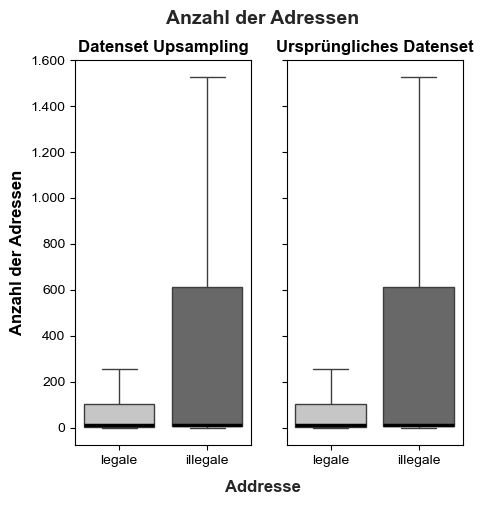

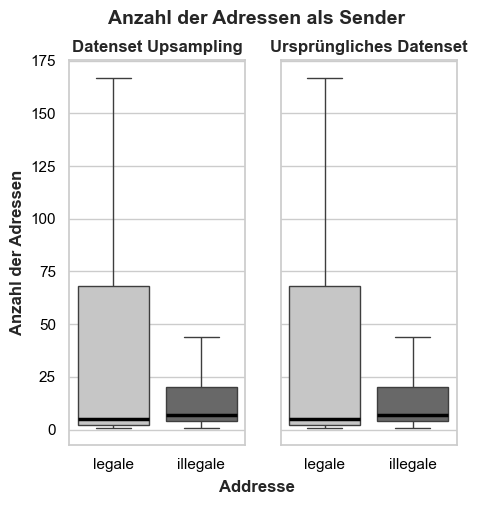

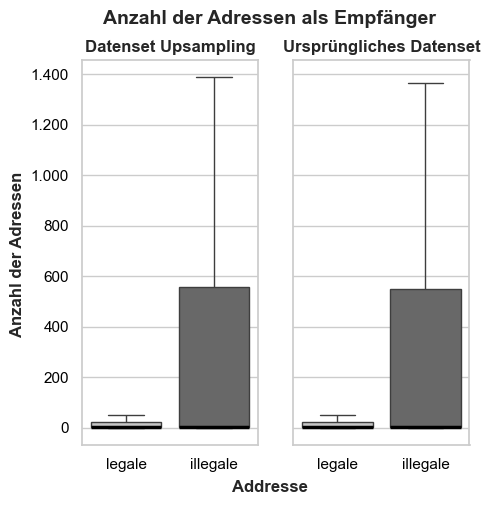

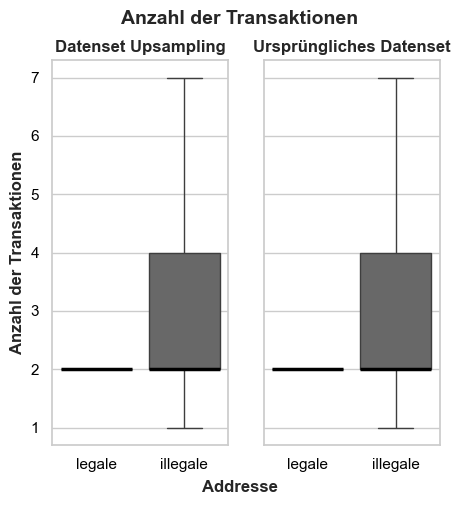

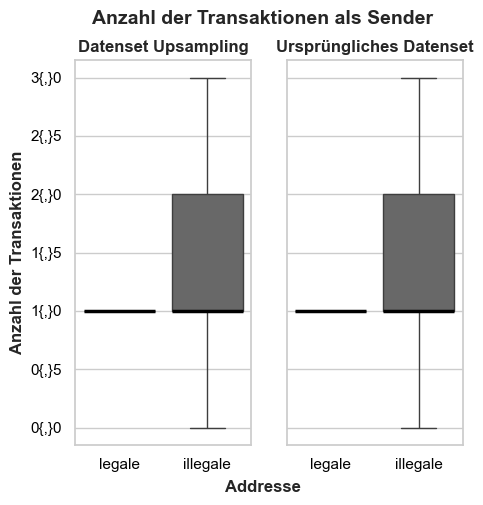

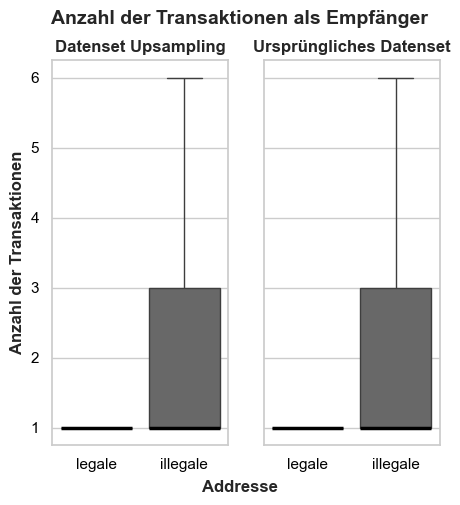

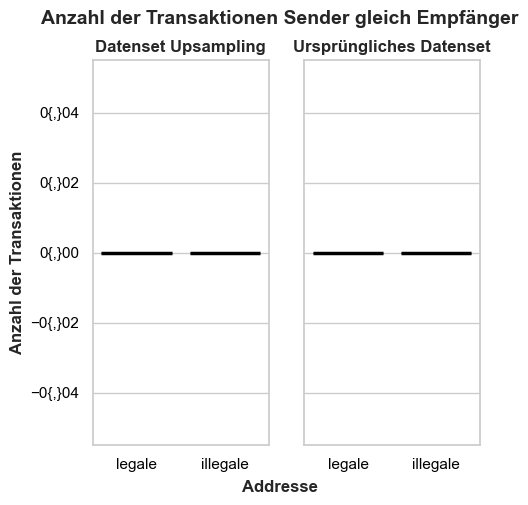

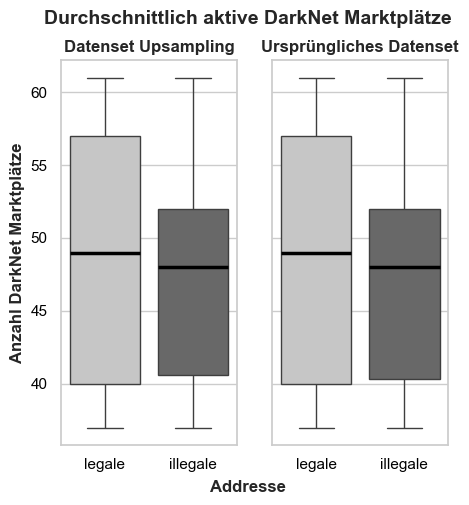

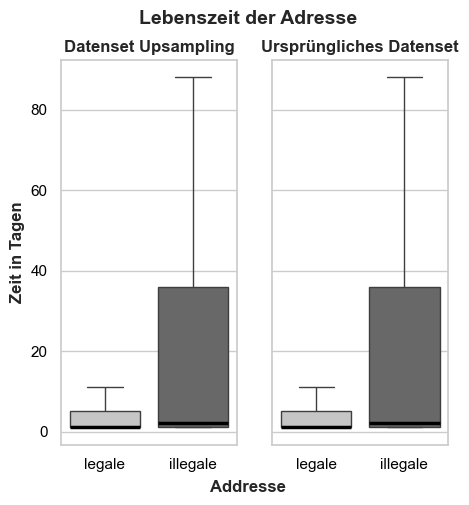

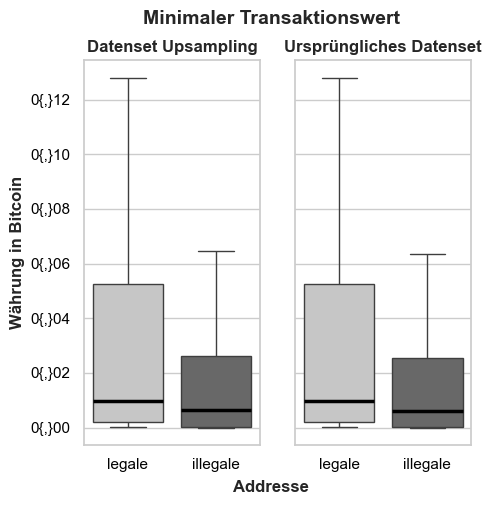

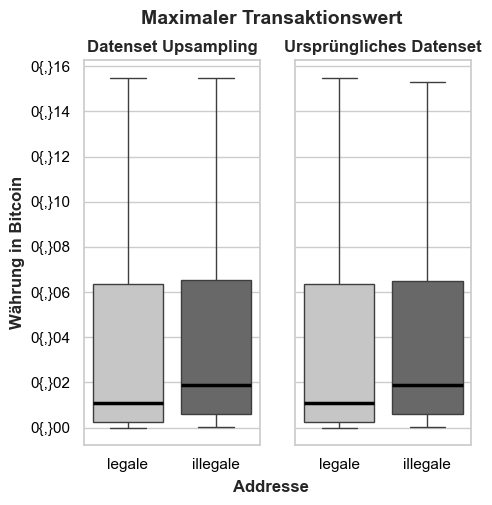

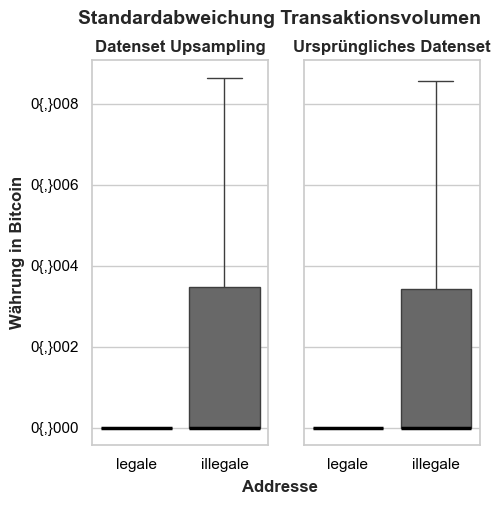

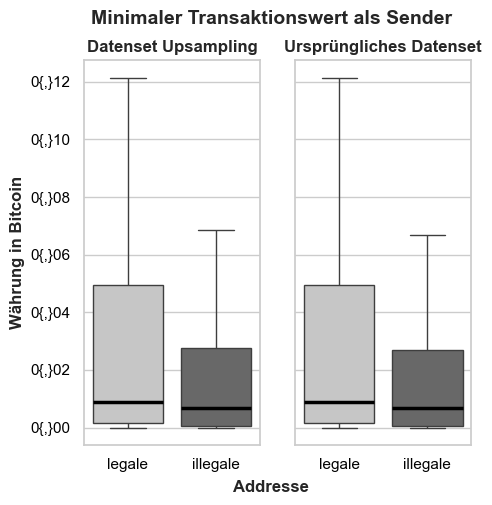

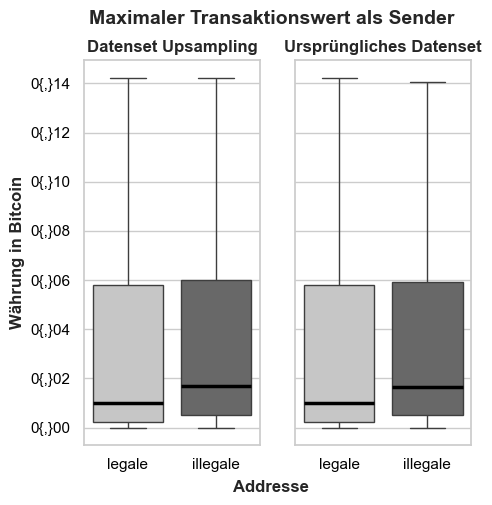

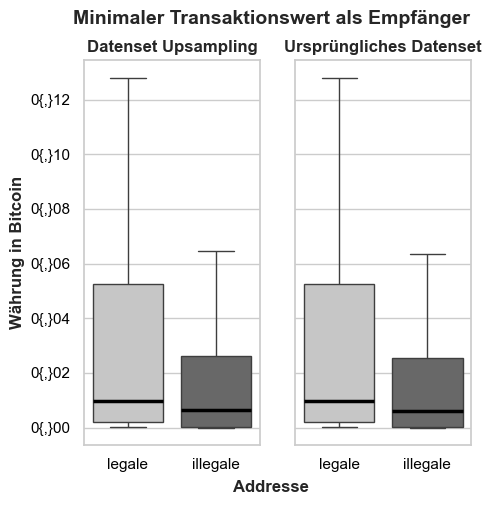

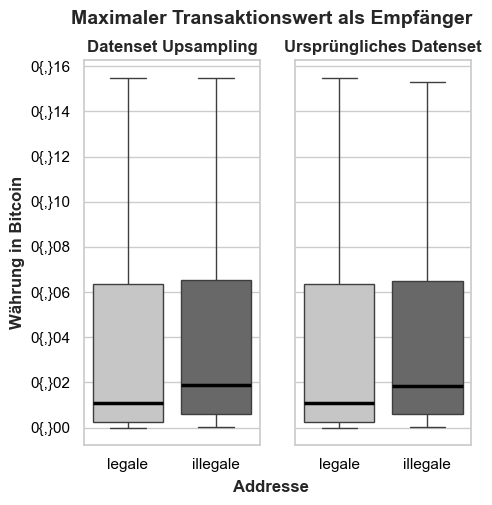

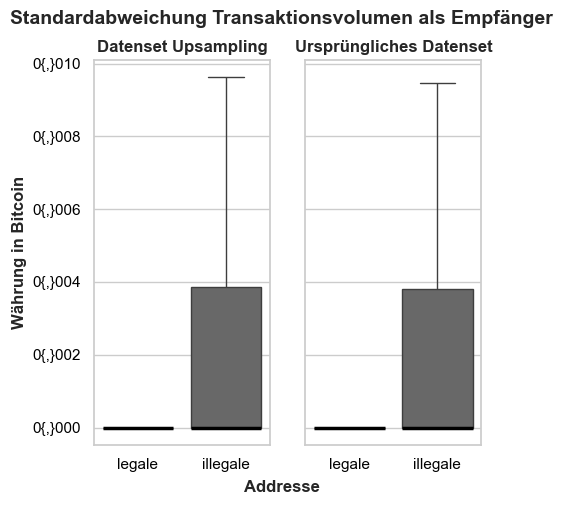

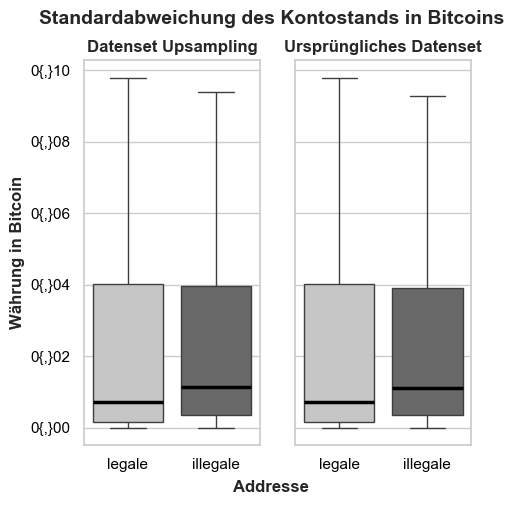

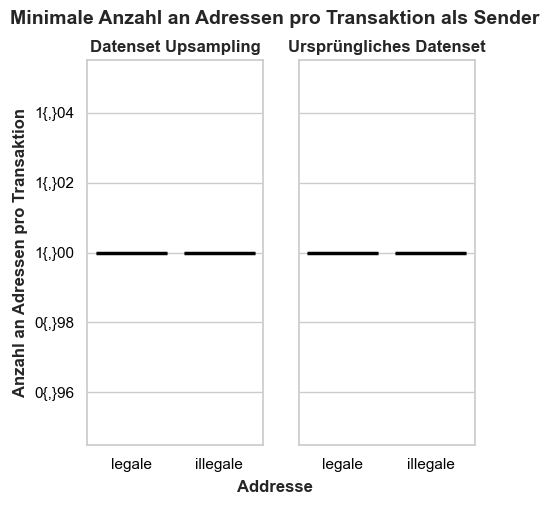

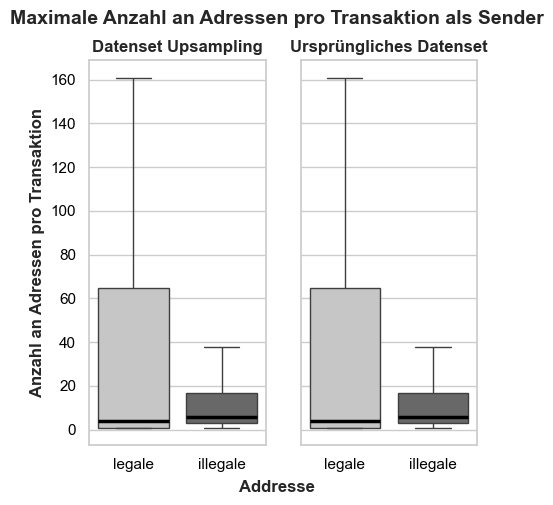

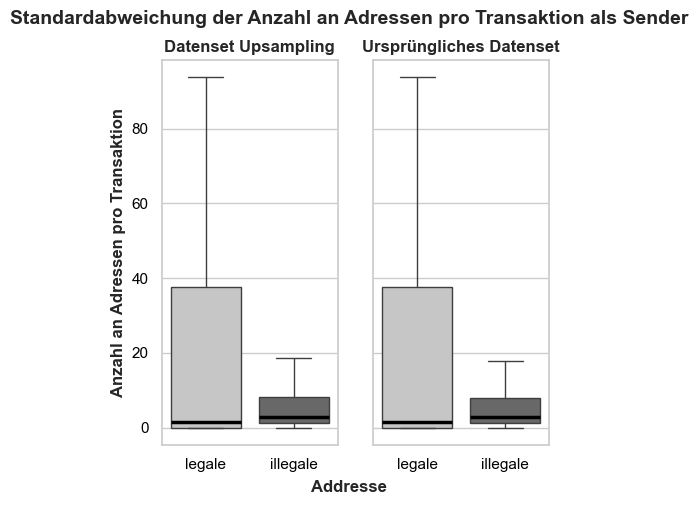

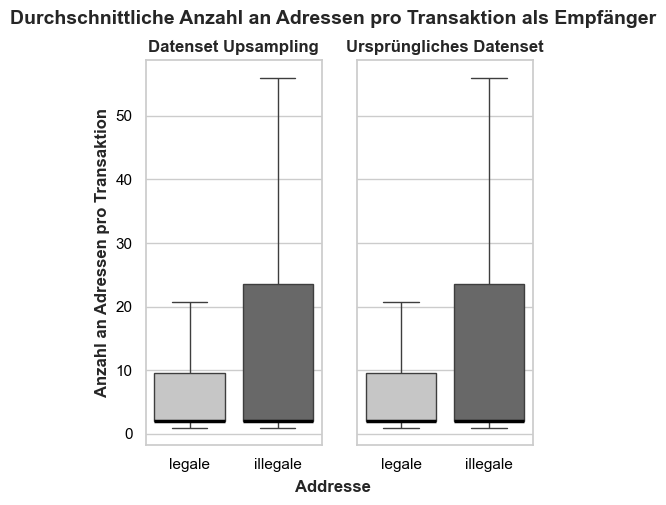

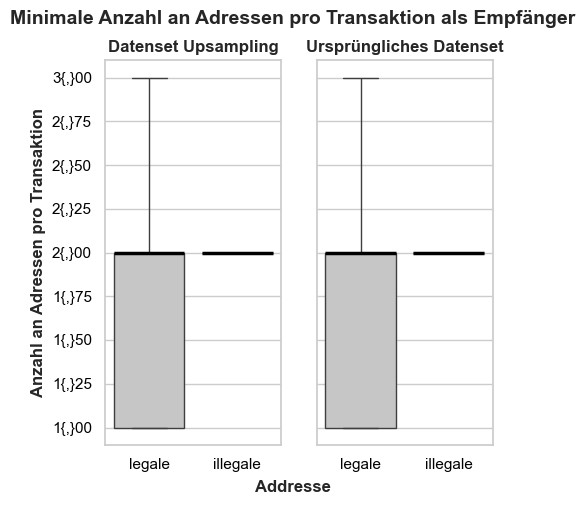

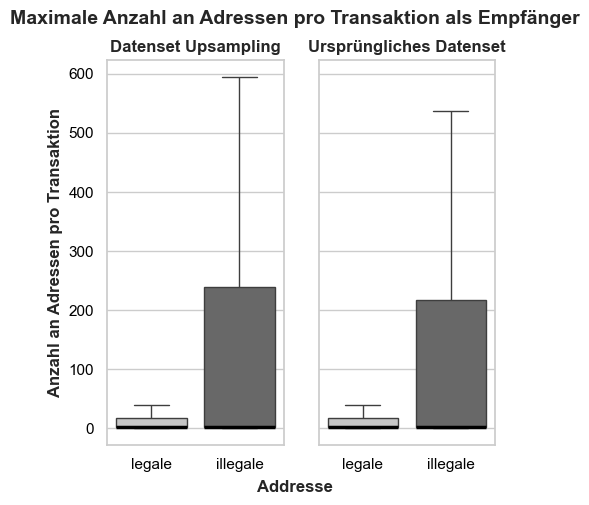

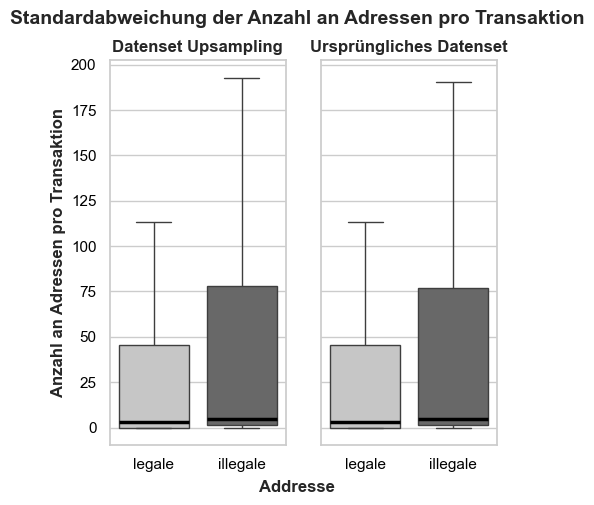

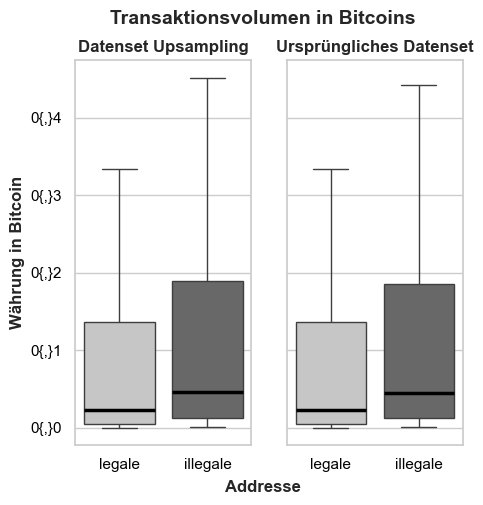

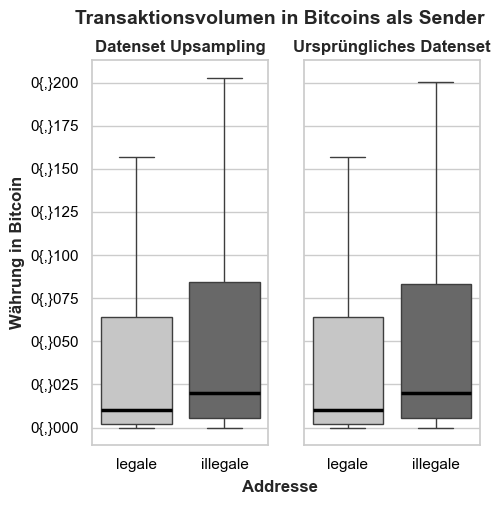

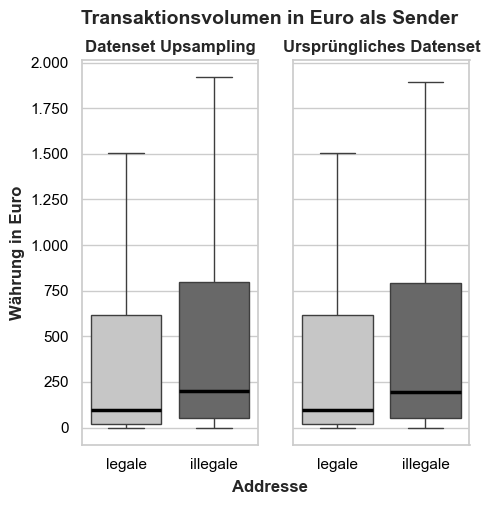

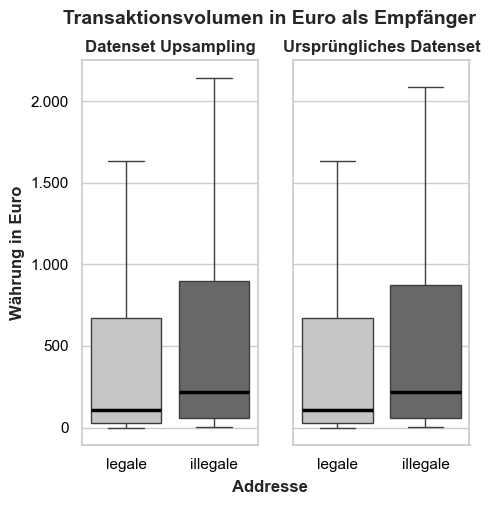

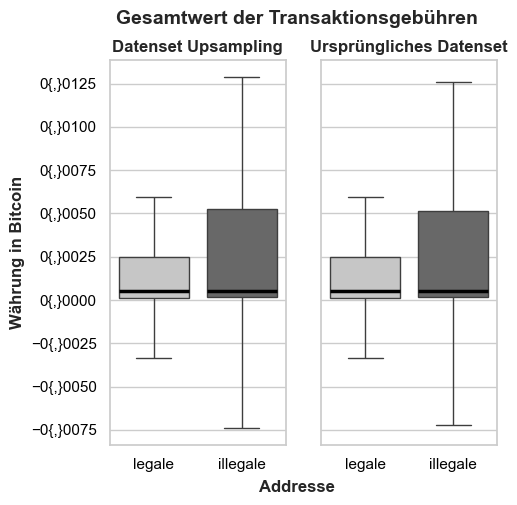

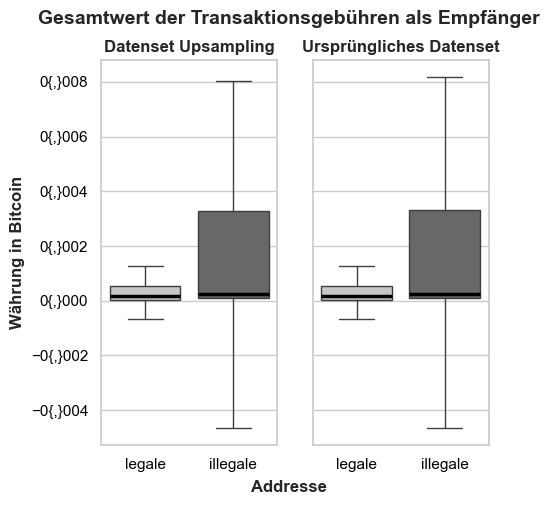

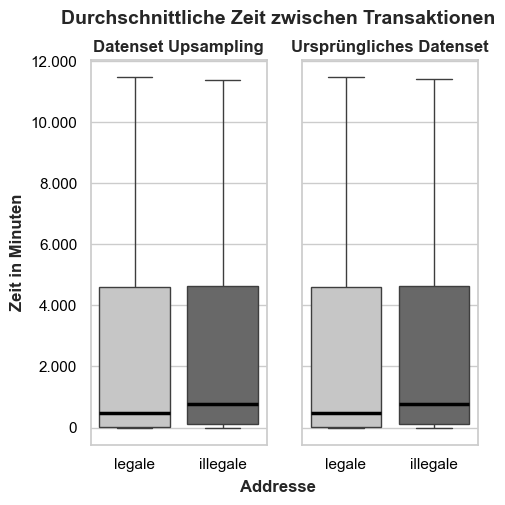

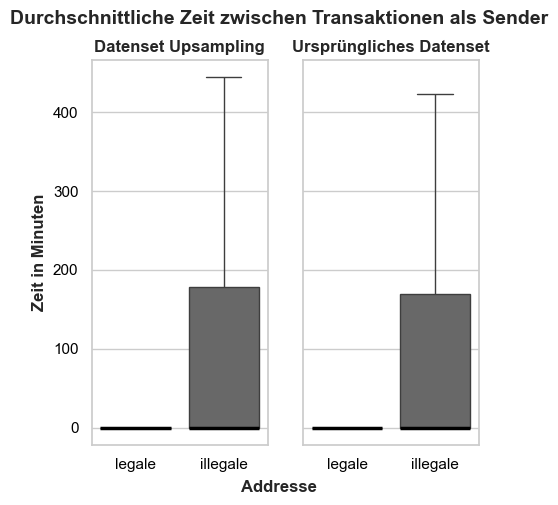

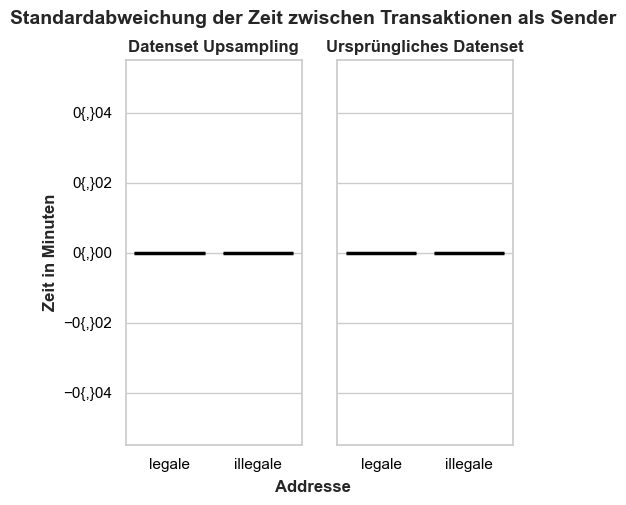

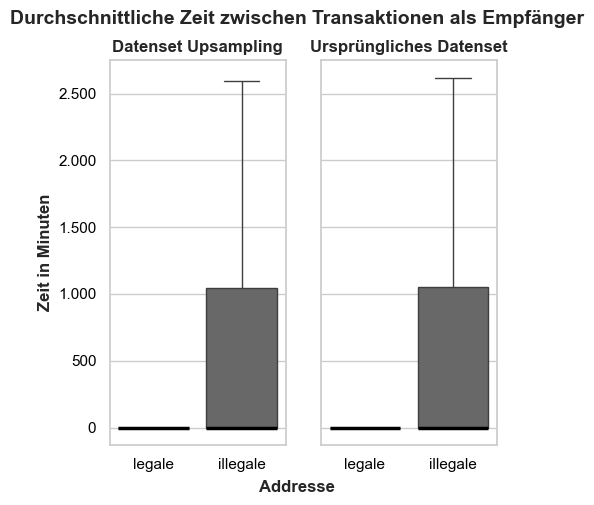

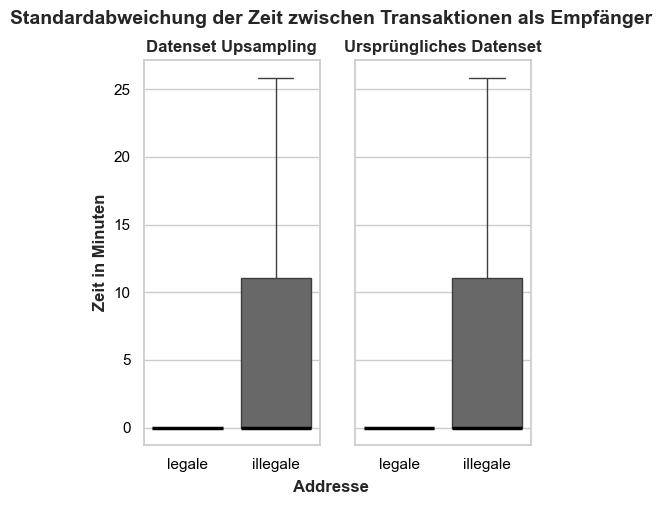

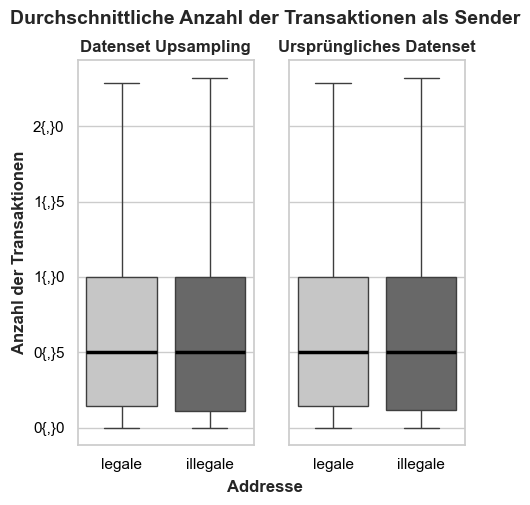

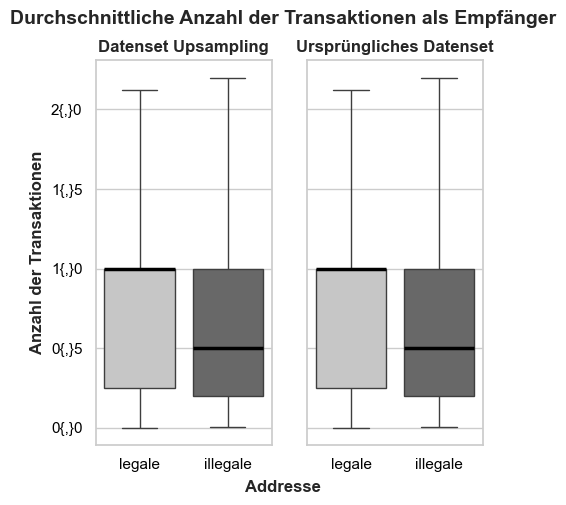

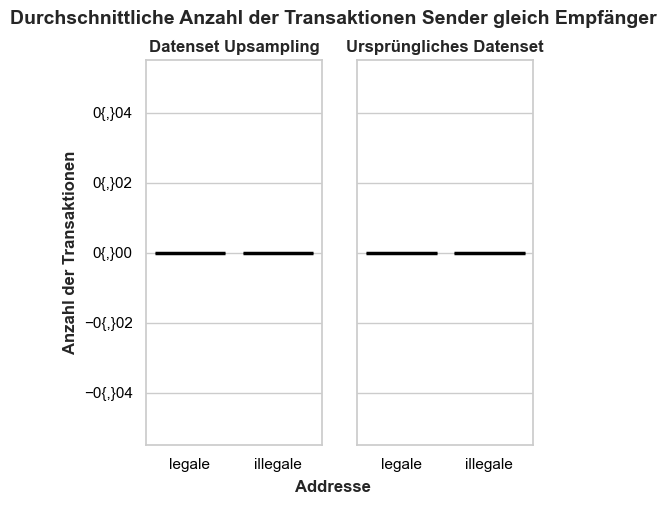

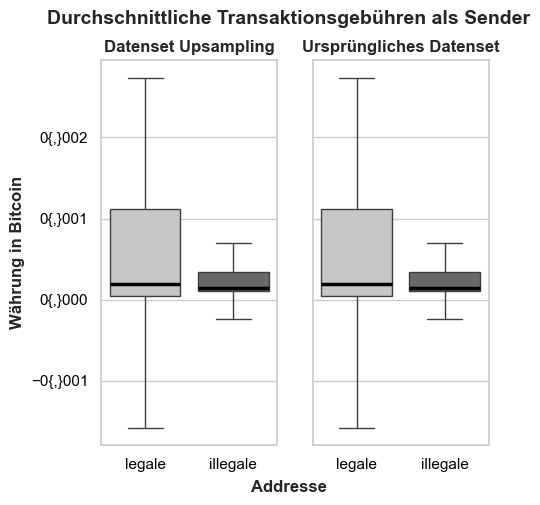

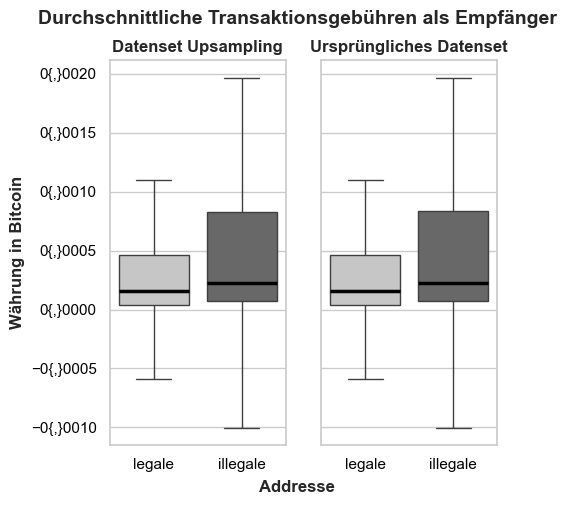

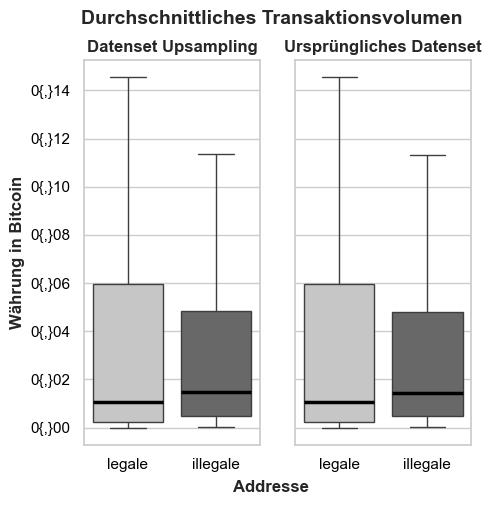

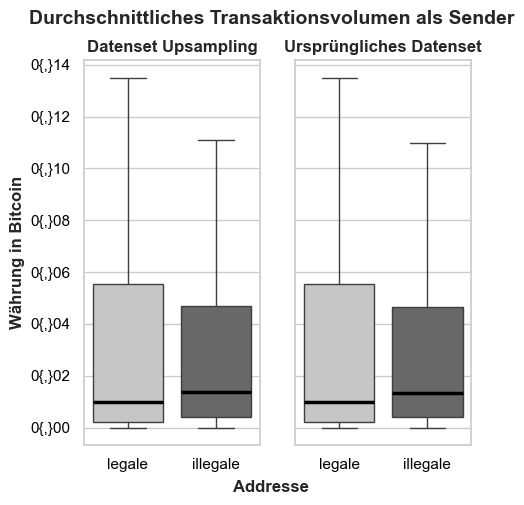

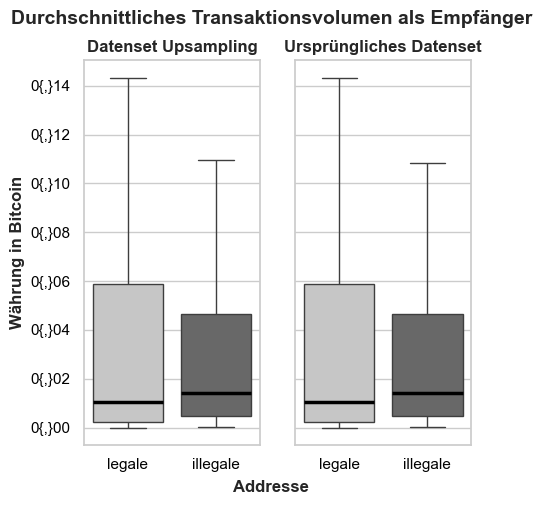

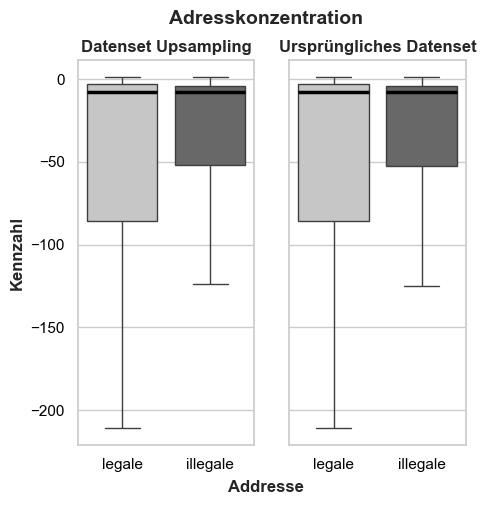

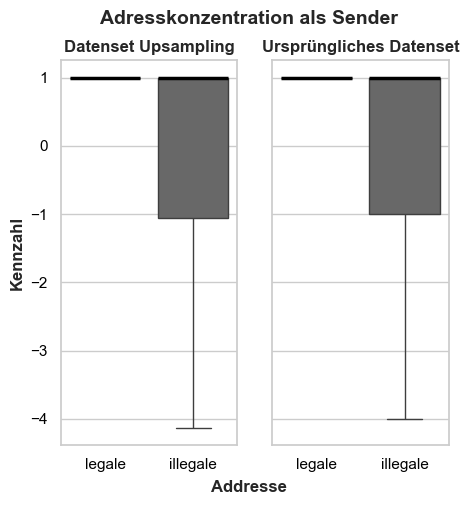

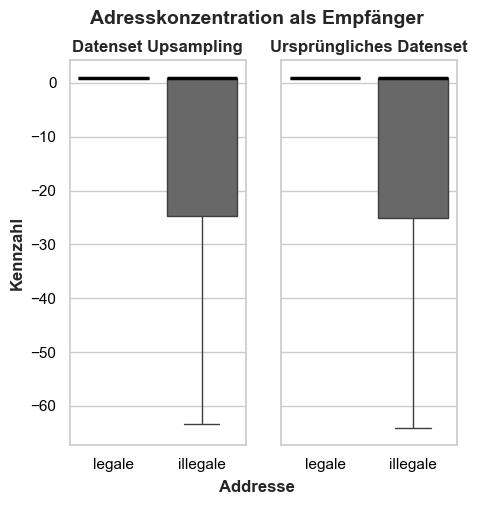

In [19]:
for i in df_ml.columns:
    if i != 'illicit':
        plot_boxplot(df_ml, df, i, feature_names_dict, features_y_axis_dict)

# Complete correlation

Correlation of features without upsampling

<Axes: >

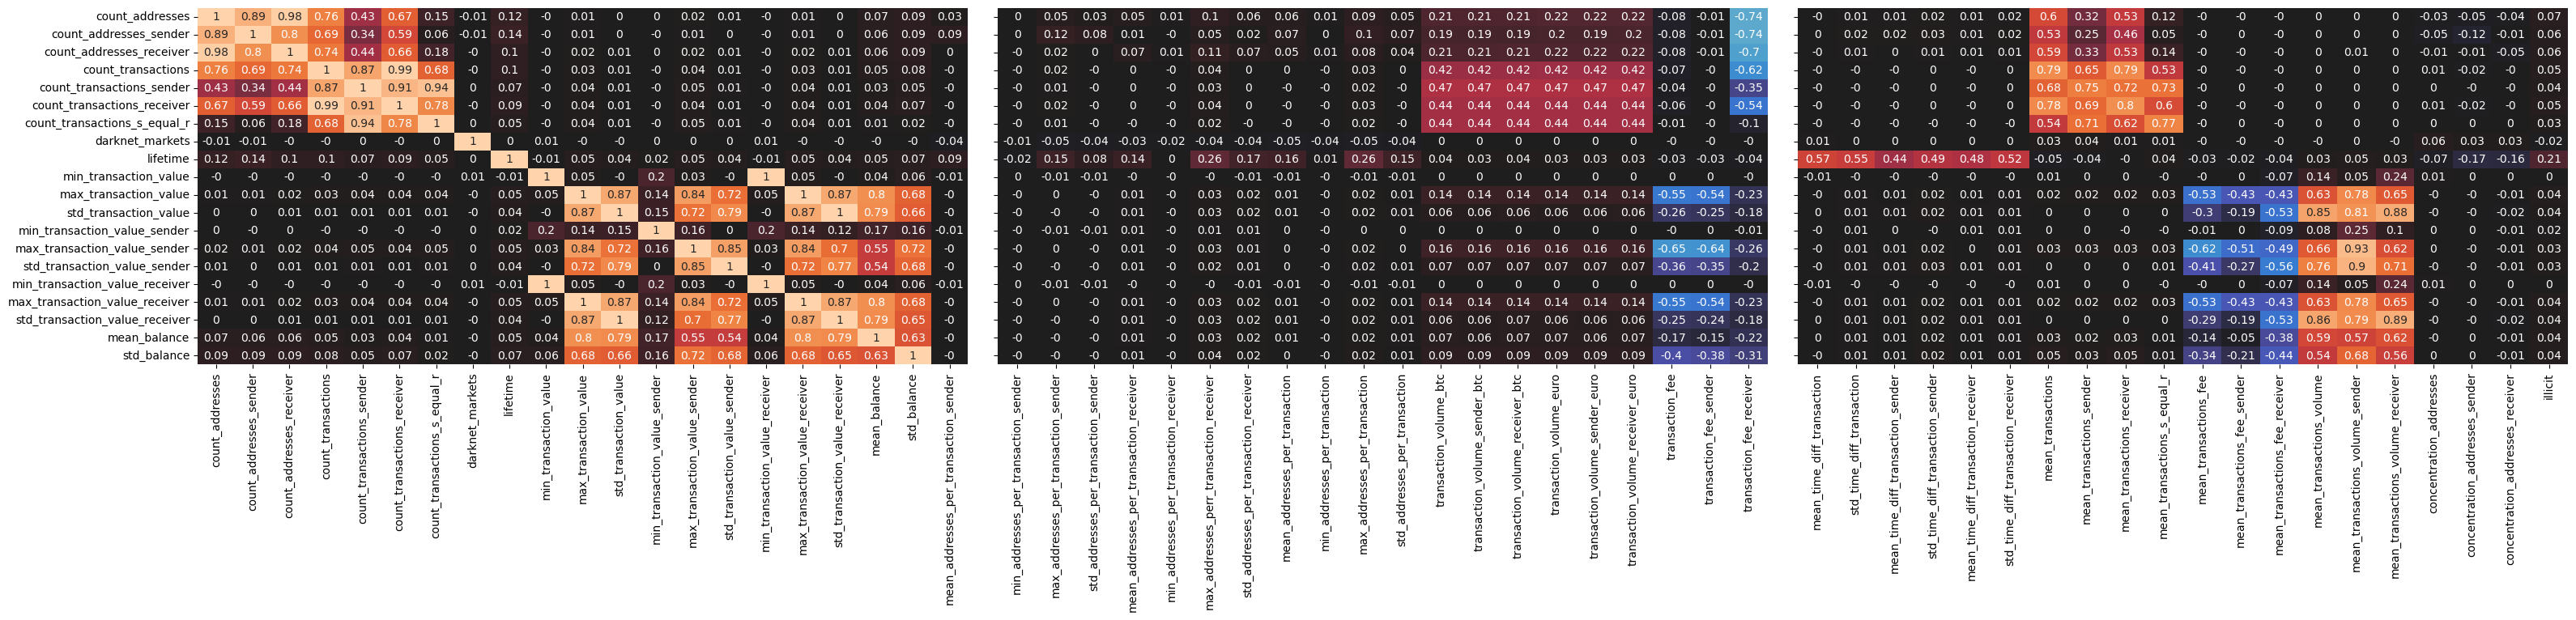

In [17]:
corr_all = df_encoded.corr()

fig, ax = plt.subplots(1,
                       3, 
                       sharey = True, 
                       figsize = (30, 5))
fig.tight_layout()
sns.heatmap(corr_all.iloc[:20, :21], 
            ax = ax[0],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[:20, :21], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all.iloc[:20, 21:41], 
            ax = ax[1],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[:20, 21:41], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all.iloc[:20, 41:], 
            ax = ax[2],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[:20, 41:], 2),
            cbar = False,
            center = 0)

<Axes: >

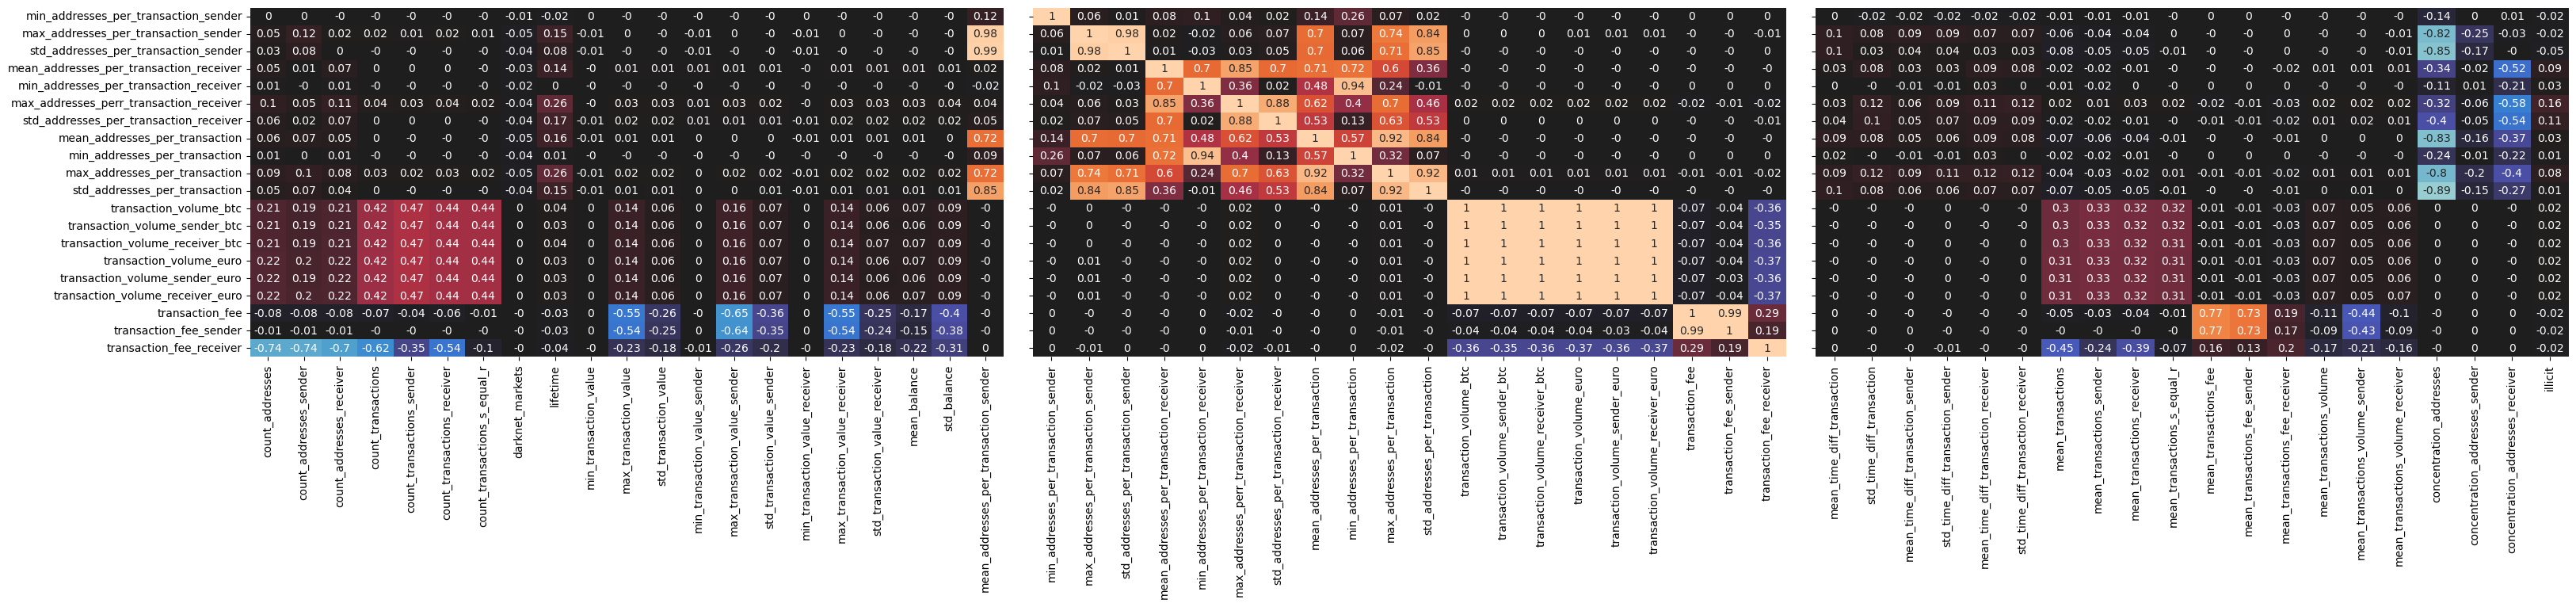

In [193]:
fig, ax = plt.subplots(1,
                       3, 
                       sharey = True, 
                       figsize = (30, 5))
fig.tight_layout()
sns.heatmap(corr_all.iloc[21:41, :21], 
            ax = ax[0],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[21:41, :21], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all.iloc[21:41, 21:41], 
            ax = ax[1],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[21:41, 21:41], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all.iloc[21:41, 41:], 
            ax = ax[2],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[21:41, 41:], 2),
            cbar = False,
            center = 0)

<Axes: >

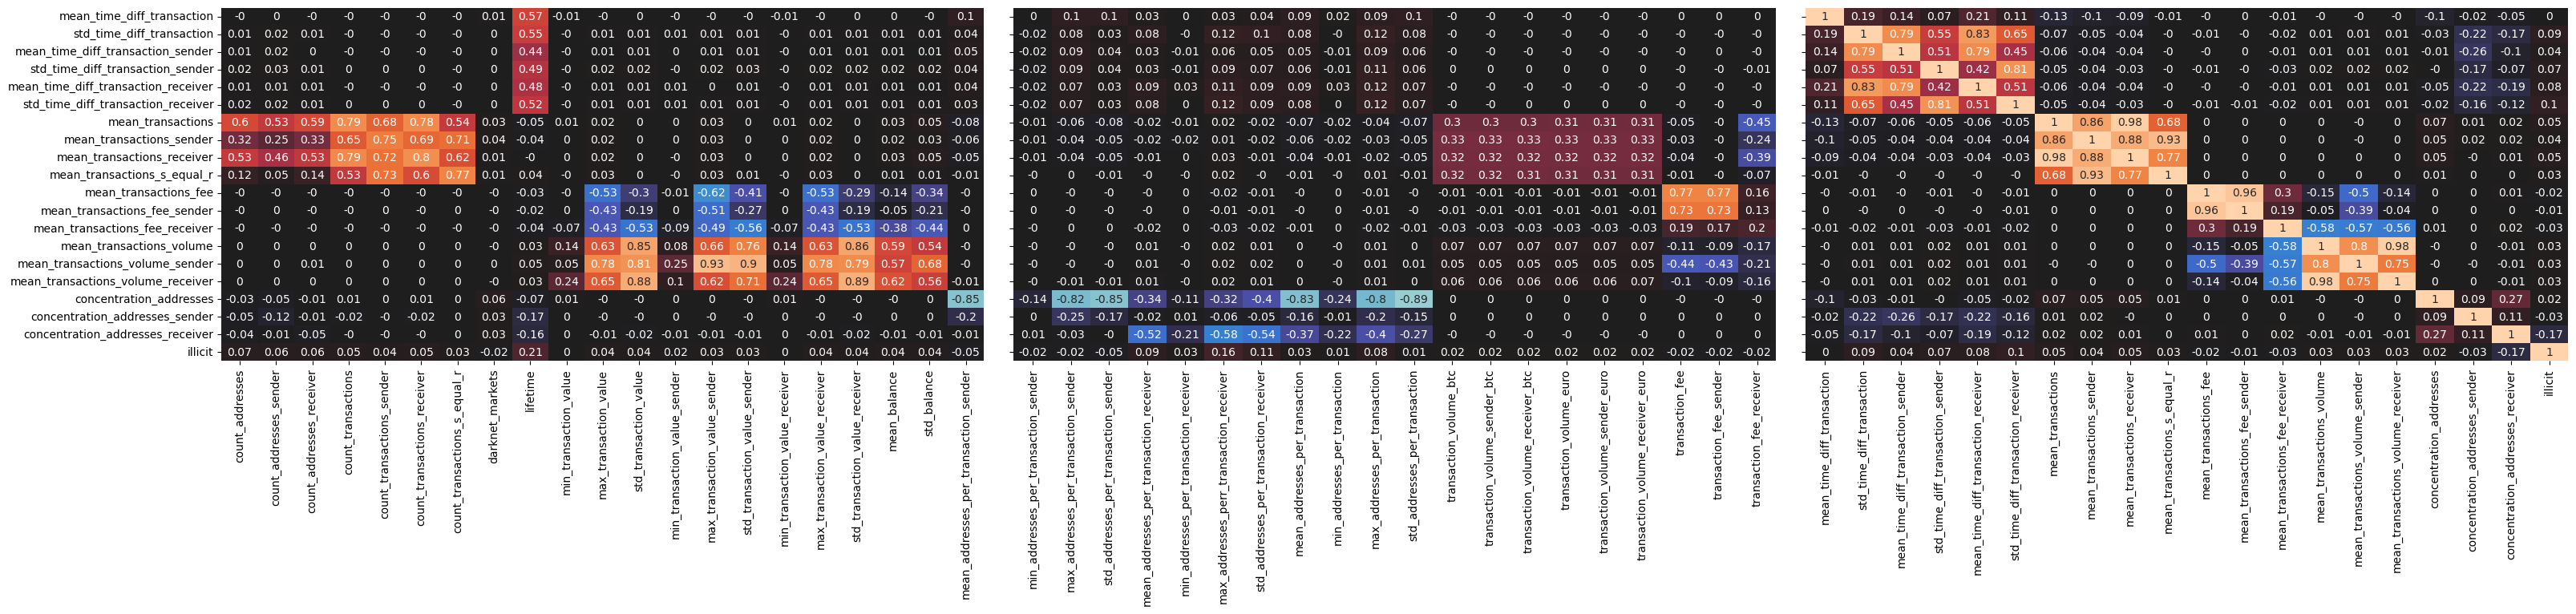

In [194]:
fig, ax = plt.subplots(1,
                       3, 
                       sharey = True, 
                       figsize = (30, 5))
fig.tight_layout()
sns.heatmap(corr_all.iloc[41:, :21], 
            ax = ax[0],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[41:, :21], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all.iloc[41:, 21:41], 
            ax = ax[1],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[41:, 21:41], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all.iloc[41:, 41:], 
            ax = ax[2],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[41:, 41:], 2),
            cbar = False,
            center = 0)

Correlation of features with upsampling

<Axes: >

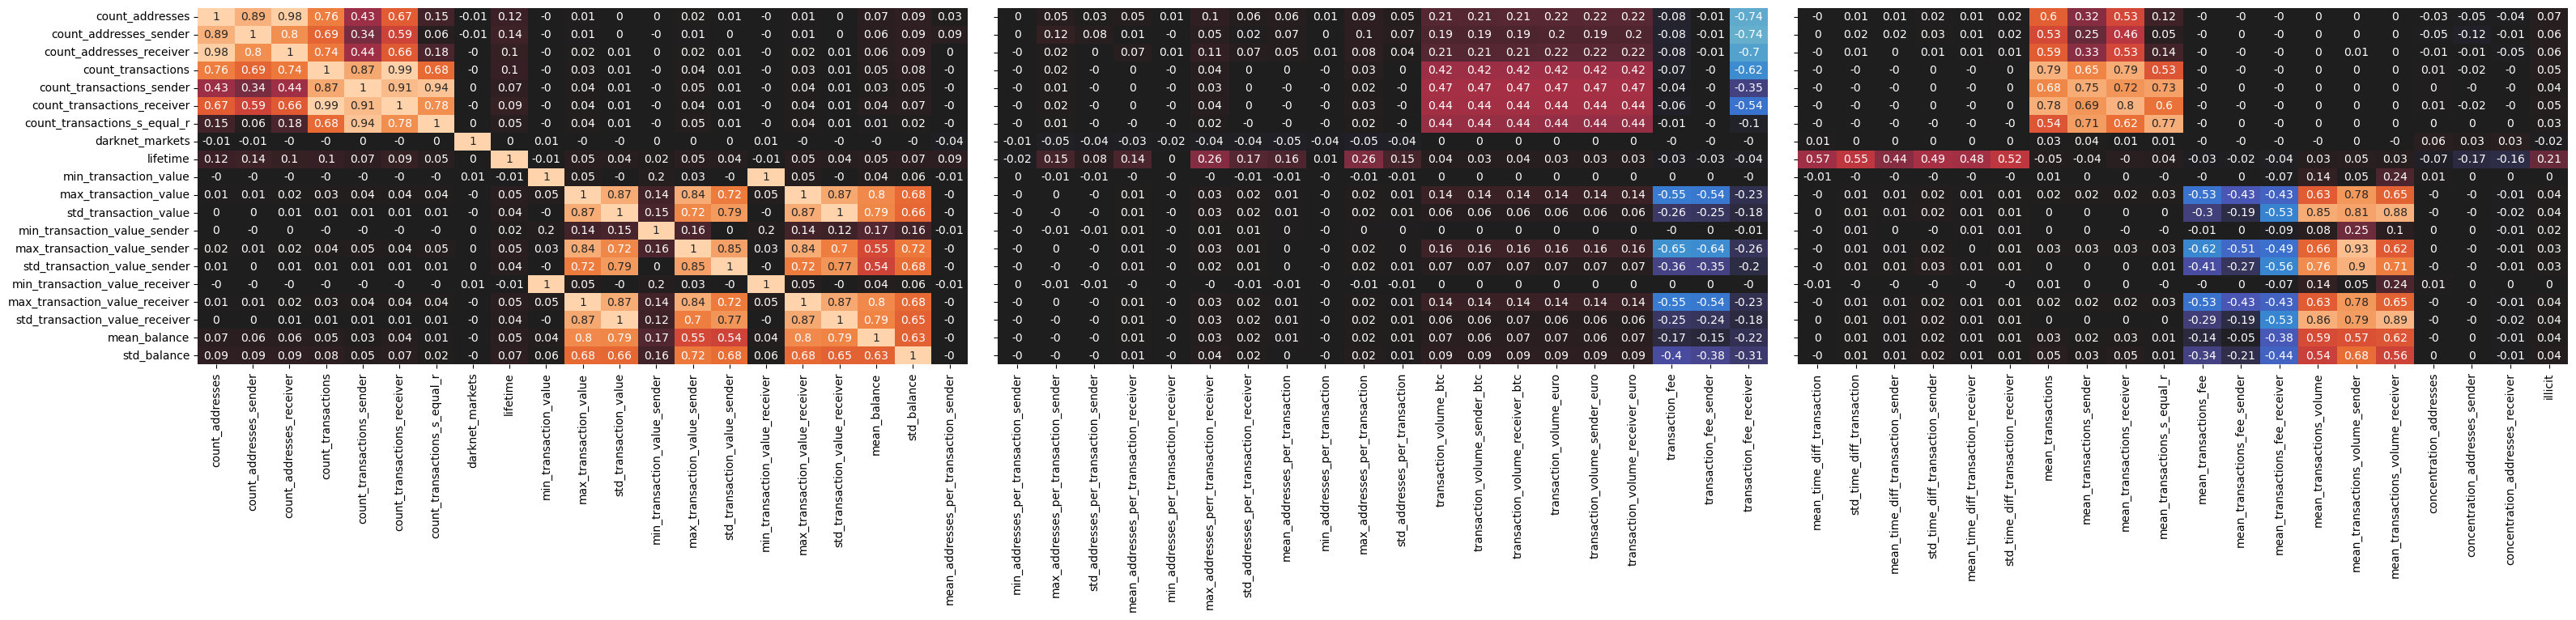

In [18]:
corr_all_upsample = df_encoded_upsample.corr()

fig, ax = plt.subplots(1,
                       3, 
                       sharey = True, 
                       figsize = (30, 5))
fig.tight_layout()
sns.heatmap(corr_all_upsample.iloc[:20, :21], 
            ax = ax[0],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[:20, :21], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all_upsample.iloc[:20, 21:41], 
            ax = ax[1],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[:20, 21:41], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all_upsample.iloc[:20, 41:], 
            ax = ax[2],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all.iloc[:20, 41:], 2),
            cbar = False,
            center = 0)

<Axes: >

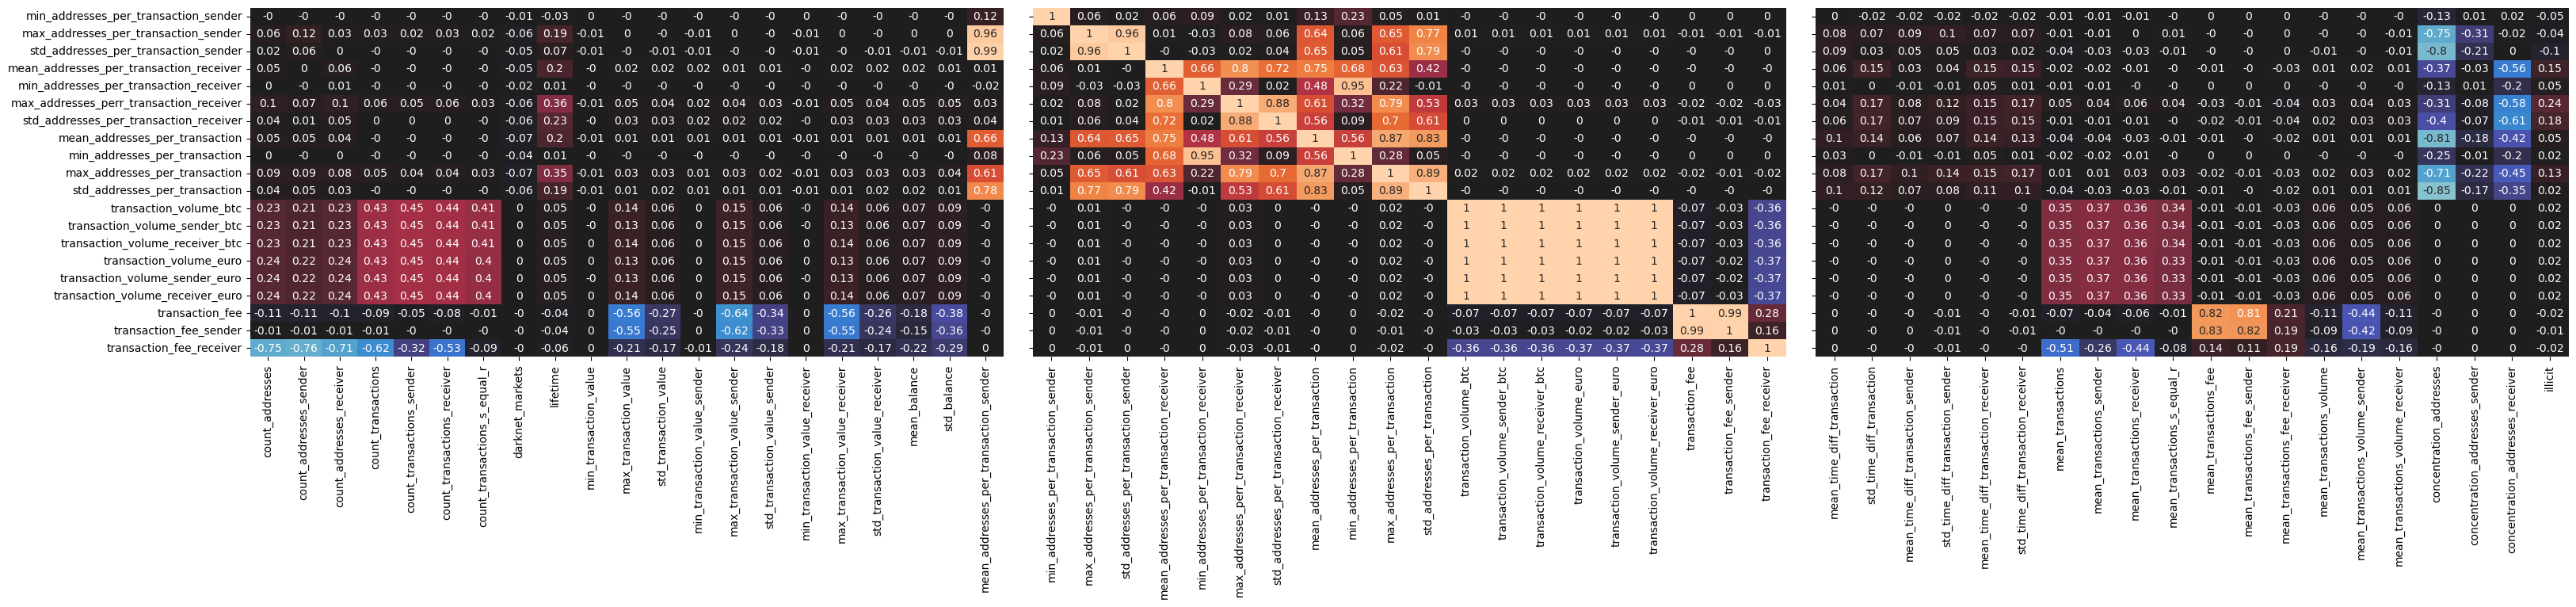

In [196]:
fig, ax = plt.subplots(1,
                       3, 
                       sharey = True, 
                       figsize = (30, 5))
fig.tight_layout()
sns.heatmap(corr_all_upsample.iloc[21:41, :21], 
            ax = ax[0],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all_upsample.iloc[21:41, :21], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all_upsample.iloc[21:41, 21:41], 
            ax = ax[1],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all_upsample.iloc[21:41, 21:41], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all_upsample.iloc[21:41, 41:], 
            ax = ax[2],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all_upsample.iloc[21:41, 41:], 2),
            cbar = False,
            center = 0)

<Axes: >

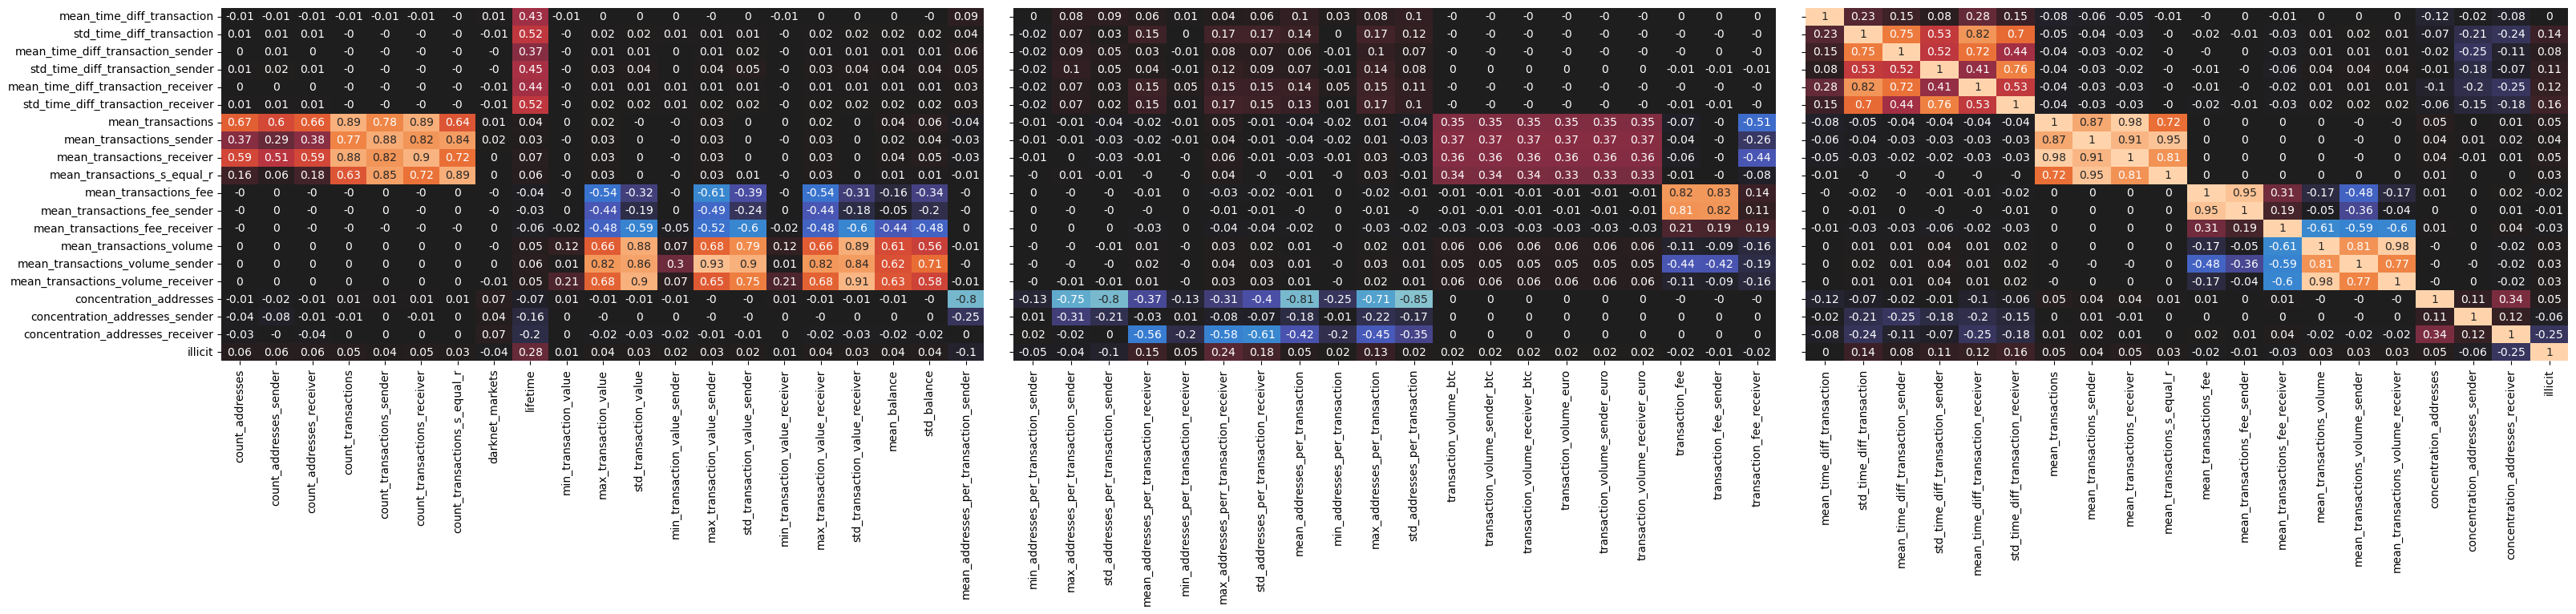

In [197]:
fig, ax = plt.subplots(1,
                       3, 
                       sharey = True, 
                       figsize = (30, 5))
fig.tight_layout()
sns.heatmap(corr_all_upsample.iloc[41:, :21], 
            ax = ax[0],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all_upsample.iloc[41:, :21], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all_upsample.iloc[41:, 21:41], 
            ax = ax[1],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all_upsample.iloc[41:, 21:41], 2),
            cbar = False,
            center = 0)
sns.heatmap(corr_all_upsample.iloc[41:, 41:], 
            ax = ax[2],
            vmin = -1,
            vmax = 1,
            annot = np.round(corr_all_upsample.iloc[41:, 41:], 2),
            cbar = False,
            center = 0)

In [296]:
corr_all.to_excel('ExcelSheets/correlation_all.xlsx')
corr_all_upsample.to_excel('ExcelSheets/correlation_all_upsample.xlsx')

# Correlation with target variable

C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11220\2228426839.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(corr_all['illicit'][:-1].sort_values(ascending = False).index, rotation = 90)
C:\Users\Florian Korn\AppData\Local\Temp\ipykernel_11220\2228426839.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(corr_all_upsample['illicit'][:-1].sort_values(ascending = False).index, rotation = 90)


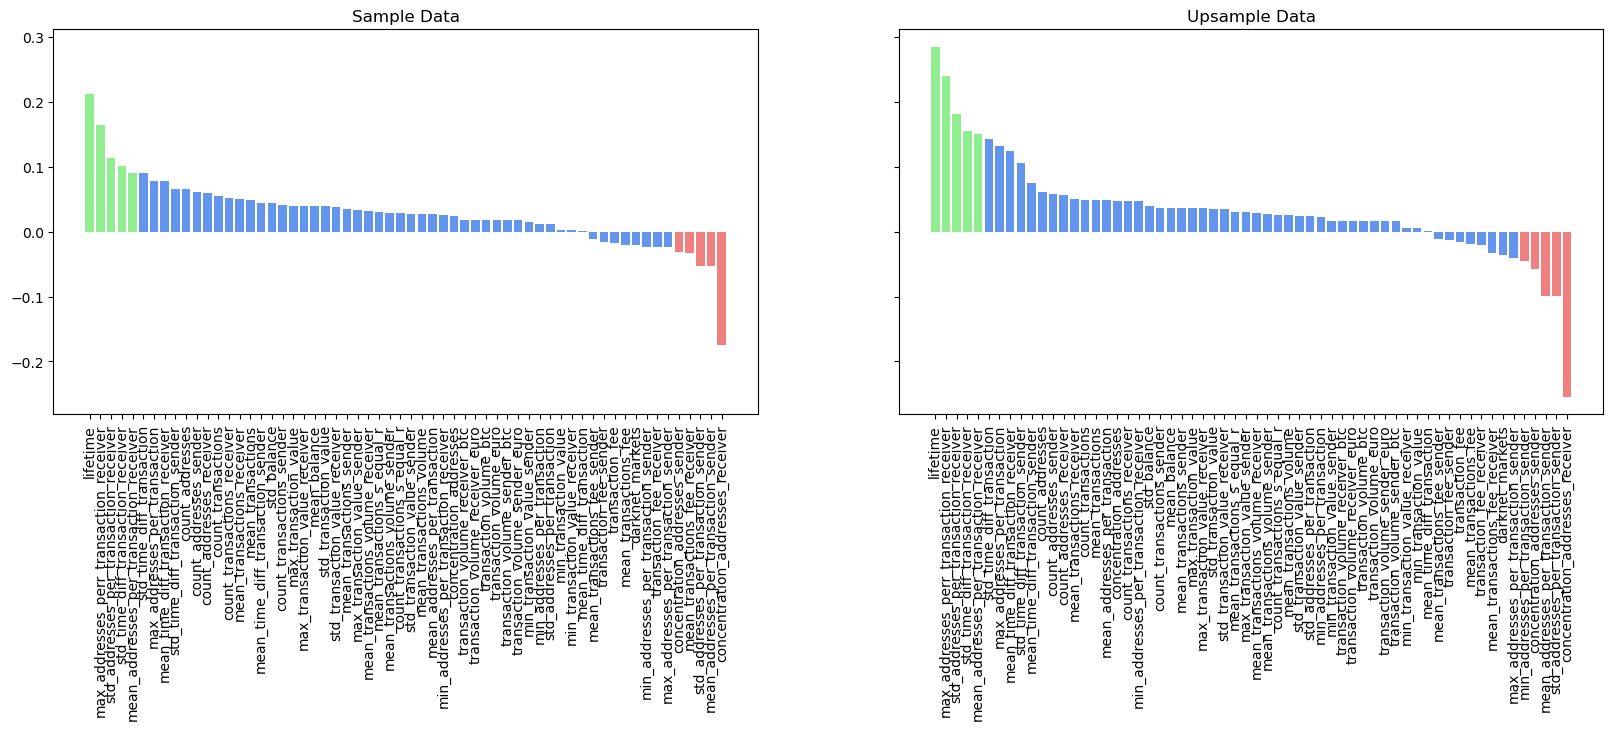

In [126]:
highlight_val = np.concatenate([corr_all.iloc[:-1, -1].sort_values(ascending = False).head(5).values, corr_all.iloc[:-1, -1].sort_values(ascending = False).tail(5).values], axis = 0)
colors = ['cornflowerblue' if i not in highlight_val else 'lightgreen' if i in highlight_val and i > 0 else 'lightcoral' for i in corr_all.iloc[:-1, -1].sort_values(ascending = False)]

fig, (ax, ax2) = plt.subplots(1, 2, sharey = True, figsize=(20, 5))
ax.bar(corr_all['illicit'][:-1].sort_values(ascending = False).index, 
       corr_all['illicit'][:-1].sort_values(ascending = False), 
       color = colors)
ax.set_title('Sample Data')
ax2.bar(corr_all_upsample['illicit'][:-1].sort_values(ascending = False).index, 
       corr_all_upsample['illicit'][:-1].sort_values(ascending = False), 
       color = colors)
ax2.set_title('Upsample Data')
#plt.title("Correlation between the features and 'illicit'")
ax.set_xticklabels(corr_all['illicit'][:-1].sort_values(ascending = False).index, rotation = 90)
ax2.set_xticklabels(corr_all_upsample['illicit'][:-1].sort_values(ascending = False).index, rotation = 90)
plt.show()

In [42]:
def plot_top10_corr(corr_all, feature_names_dict):
    '''
    This function plots numerical and continious data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot

    Returns:
    None, but prints the plots.
    '''
    #binwidth = np.round((np.max(data_upsampled[x]) - np.min(data_upsampled[x])) * ((len(data_upsampled[x]) ** (1/3))) / (3.49 * np.std(data_upsampled[x])))
    #binwidth = int(binwidth)
    locale.setlocale(locale.LC_ALL, 'de_DE')
    highlight_val = np.concatenate([corr_all.iloc[:-1, -1].sort_values(ascending = False).head(5).values, corr_all.iloc[:-1, -1].sort_values(ascending = False).tail(5).values], axis = 0)
    corr_all = corr_all.sort_values(by = 'illicit', ascending = False)
    corr_all = corr_all[corr_all['illicit'].isin(highlight_val)]
    dict_font_subtitles = {'family': 'Arial', 'size': 10, 'weight': 'bold', 'color': 'black'}
    cm = 1/2.54
    fig, ax = plt.subplots(1, 1, sharey = True, figsize=(15*cm, 11*cm))
    sns.set(style="whitegrid")
    sns.set_context(rc = {'patch.linewidth': 1.0})
    sns.barplot(y = corr_all['illicit'].index,
                x = corr_all['illicit'],
                color = 'black',
                linestyle = '-',
                linewidth = 1,
                edgecolor = 'k',
                orient = 'h')
    fig.suptitle('Top 10 der Korrelation zwischen Feature und Zielvariable', color = 'black', weight = 'bold', family = 'Arial', size = 12)
    #plt.title("Correlation between the features and 'illicit'")
    ax.ticklabel_format(axis = 'x', style = 'plain', useLocale = True)
    ax.set_yticklabels(corr_all['illicit'].index.map(feature_names_dict), fontdict = dict_font_subtitles)
    ax.set_xlabel('Korrelation', fontdict = dict_font_subtitles)
    ax.set_xlim(-0.3, 0.3)
    plt.tick_params(axis='x', colors='black')
    plt.tick_params(axis = 'y', left = False, right = True, labelleft = False, labelright = True)
    ax.bar_label(ax.containers[0], fmt = '{:#.2n}', label_type = 'center', color = 'white', weight = 'bold', family = 'Arial', size = 10)
    plt.savefig('plots/correlation/top10_correlation_features_with_target.pdf', format='pdf',  bbox_inches='tight')


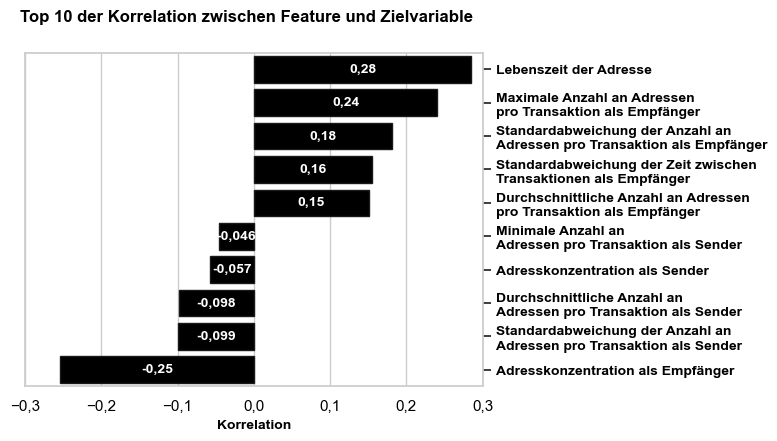

In [44]:
feature_dict = {'lifetime': 'Lebenszeit der Adresse', 
                      'mean_addresses_per_transaction_sender': 'Durchschnittliche Anzahl an \nAdressen pro Transaktion als Sender',
                      'min_addresses_per_transaction_sender': 'Minimale Anzahl an \nAdressen pro Transaktion als Sender',
                      'std_addresses_per_transaction_sender': 'Standardabweichung der Anzahl an \nAdressen pro Transaktion als Sender',
                      'mean_addresses_per_transaction_receiver': 'Durchschnittliche Anzahl an Adressen \npro Transaktion als Empfänger',
                      'max_addresses_perr_transaction_receiver': 'Maximale Anzahl an Adressen \npro Transaktion als Empfänger',
                      'std_addresses_per_transaction_receiver': 'Standardabweichung der Anzahl an \nAdressen pro Transaktion als Empfänger',
                      'std_time_diff_transaction_receiver': 'Standardabweichung der Zeit zwischen \nTransaktionen als Empfänger', 
                      'concentration_addresses_sender': 'Adresskonzentration als Sender', 
                      'concentration_addresses_receiver': 'Adresskonzentration als Empfänger'}

plot_top10_corr(corr_all_upsample, feature_dict)

In [127]:
corr_all.iloc[:-1, -1].sort_values(ascending = False).reset_index().to_excel('correlation_with_target_variable.xlsx')
corr_all_2.iloc[:-1, -1].sort_values(ascending = False).reset_index().to_excel('correlation_with_target_variable_upsample.xlsx')

In [16]:
df.to_excel('original_dataset.xlsx')

In [ ]:
df_ml.to_excel('dataset_upsampled.xlsx')

In [117]:
from dask.diagnostics import ProgressBar
with ProgressBar(): print(len(dd.read_parquet('complete_csv/tx_out-610682-663904')['address'].unique()))

[########################################] | 100% Completed | 5hr 40m
167061825


In [9]:
df = dd.read_parquet('tx_out-610682-663904')
df = df[df['address'].isin(dd.read_parquet('illegal_addresses')['address'].compute())]
df = df['txid'].unique()
df = len(df)
df

1871156

Boxplots for Master Thesis

In [155]:
def plot_boxplot_fancy(data, x, features_names_dict, features_y_axis_dict):
    '''
    This function plots numerical and continious data.

    Parameters:
    data_encoded : this is a pandas DataFrame which has encoded (ordinal) data in it
    x : is the variable we want to plot

    Returns:
    None, but prints the plots.
    '''
    #binwidth = np.round((np.max(data_upsampled[x]) - np.min(data_upsampled[x])) * ((len(data_upsampled[x]) ** (1/3))) / (3.49 * np.std(data_upsampled[x])))
    #binwidth = int(binwidth)
    locale.setlocale(locale.LC_ALL, 'de_DE')
    data['illicit'] = data['illicit'].replace(0, 'legale').replace(1, 'illegale')
    cm = 1/2.54

    fig, ax = plt.subplots(1, len(x), figsize = (15*cm,8*cm), sharex = True, sharey = False)
    medianprops = dict(linestyle='-', linewidth=1, color='grey')
    #meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='black')
    dict_font_subtitles = {'fontsize': 12, 'fontweight': 'bold', 'family': 'Arial', 'color': 'black'}
    
    sns.set(style="whitegrid")

    PROPS = {
    'boxprops':{'edgecolor':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
    }

    for i in range(len(x)):
        sns.boxplot(data,
                    orient = 'v',
                    x = 'illicit',
                    y = x[i],
                    ax = ax[i],
                    #showmeans=True,
                    palette = 'Greys',
                    medianprops = medianprops,
                    #meanprops = meanpointprops,
                    showfliers = False,
                    **PROPS)
        ax[i].set_title(features_names_dict[x[i]], fontdict = dict_font_subtitles, pad=10, wrap=True)
        ax[i].set_xlabel('')
        ax[i].set_ylabel(features_y_axis_dict[x[i]], fontdict = dict_font_subtitles)
        ax[i].tick_params(axis='both', colors='black', labelsize=11)
        ax[i].ticklabel_format(axis = 'y', style = 'plain', useLocale = True)

    #fig.suptitle(features_names_dict[x], weight = 'bold', size = 14, family = 'Arial')

    fig.supxlabel('Adresse', 
                  weight = 'bold', 
                  size = 12, 
                  family = 'Arial', 
                  color = 'black',
                  y=0.08)
    fig.tight_layout()
    plt.savefig(f'plots/boxplots_{x}.pdf', format='pdf', bbox_inches='tight')

In [99]:
features_y_axis_dict2 = {'count_addresses': 'Anzahl',
                        'count_addresses_sender': 'Anzahl',
                        'count_addresses_receiver': 'Anzahl',
                        'count_transactions': 'Anzahl',
                        'count_transactions_sender': 'Anzahl',
                        'count_transactions_receiver': 'Anzahl', 
                        'count_transactions_s_equal_r': 'Anzahl',
                        'darknet_markets': 'Anzahl', 
                        'lifetime': 'Zeit in Minuten', 
                        'min_transaction_value': 'Währung in Bitcoin',
                        'max_transaction_value': 'Währung in Bitcoin', 
                        'std_transaction_value': 'Währung in Bitcoin',
                        'min_transaction_value_sender': 'Währung in Bitcoin', 
                        'max_transaction_value_sender': 'Währung in Bitcoin',
                        'std_transaction_value_sender': 'Währung in Bitcoin', 
                        'min_transaction_value_receiver': 'Währung in Bitcoin',
                        'max_transaction_value_receiver': 'Währung in Bitcoin', 
                        'std_transaction_value_receiver': 'Währung in Bitcoin',
                        'mean_balance': 'Währung in Bitcoin', 
                        'std_balance': 'Währung in Bitcoin', 
                        'mean_addresses_per_transaction_sender': 'Anzahl',
                        'min_addresses_per_transaction_sender': 'Anzahl',
                        'max_addresses_per_transaction_sender': 'Anzahl',
                        'std_addresses_per_transaction_sender': 'Anzahl',
                        'mean_addresses_per_transaction_receiver': 'Anzahl',
                        'min_addresses_per_transaction_receiver': 'Anzahl',
                        'max_addresses_perr_transaction_receiver': 'Anzahl',
                        'std_addresses_per_transaction_receiver': 'Anzahl',
                        'mean_addresses_per_transaction': 'Anzahl', 
                        'min_addresses_per_transaction': 'Anzahl',
                        'max_addresses_per_transaction': 'Anzahl', 
                        'std_addresses_per_transaction': 'Anzahl',
                        'transaction_volume_btc': 'Währung in Bitcoin', 
                        'transaction_volume_sender_btc': 'Währung in Bitcoin',
                        'transaction_volume_receiver_btc': 'Währung in Bitcoin', 
                        'transaction_volume_euro': 'Währung in Euro',
                        'transaction_volume_sender_euro': 'Währung in Euro', 
                        'transaction_volume_receiver_euro': 'Währung in Euro',
                        'transaction_fee': 'Währung in Bitcoin', 
                        'transaction_fee_sender': 'Währung in Bitcoin', 
                        'transaction_fee_receiver': 'Währung in Bitcoin',
                        'mean_time_diff_transaction': 'Zeit in Minuten', 
                        'std_time_diff_transaction': 'Zeit in Minuten',
                        'mean_time_diff_transaction_sender': 'Zeit in Minuten', 
                        'std_time_diff_transaction_sender': 'Zeit in Minuten',
                        'mean_time_diff_transaction_receiver': 'Zeit in Minuten',
                        'std_time_diff_transaction_receiver': 'Zeit in Minuten', 
                        'mean_transactions': 'Anzahl',
                        'mean_transactions_sender': 'Anzahl', 
                        'mean_transactions_receiver': 'Anzahl',
                        'mean_transactions_s_equal_r': 'Anzahl', 
                        'mean_transactions_fee': 'Währung in Bitcoin',
                        'mean_transactions_fee_sender': 'Währung in Bitcoin', 
                        'mean_transactions_fee_receiver': 'Währung in Bitcoin',
                        'mean_transactions_volume': 'Währung in Bitcoin', 
                        'mean_transactions_volume_sender': 'Währung in Bitcoin',
                        'mean_transactions_volume_receiver': 'Währung in Bitcoin', 
                        'concentration_addresses': 'Kennzahl',
                        'concentration_addresses_sender': 'Kennzahl', 
                        'concentration_addresses_receiver': 'Kennzahl'}

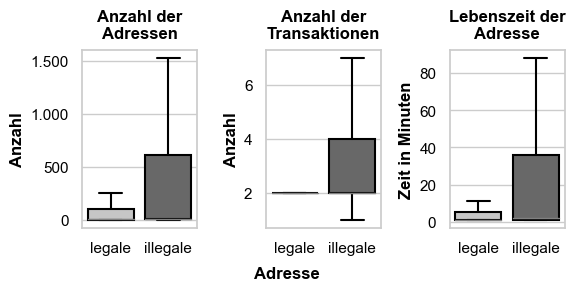

In [175]:
plot_boxplot_fancy(df_ml, ['count_addresses', 'count_transactions', 'lifetime'], feature_names_dict, features_y_axis_dict2)

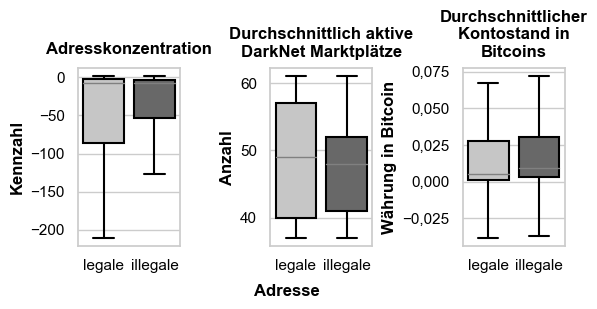

In [178]:
plot_boxplot_fancy(df_ml, ['concentration_addresses', 'darknet_markets', 'mean_balance'], feature_names_dict, features_y_axis_dict2)

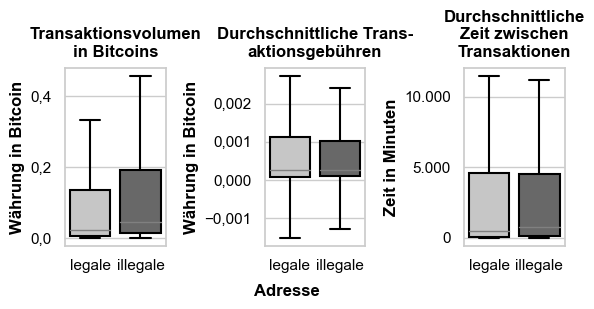

In [164]:
plot_boxplot_fancy(df_ml, ['transaction_volume_btc', 'mean_transactions_fee', 'mean_time_diff_transaction'], feature_names_dict, features_y_axis_dict2)

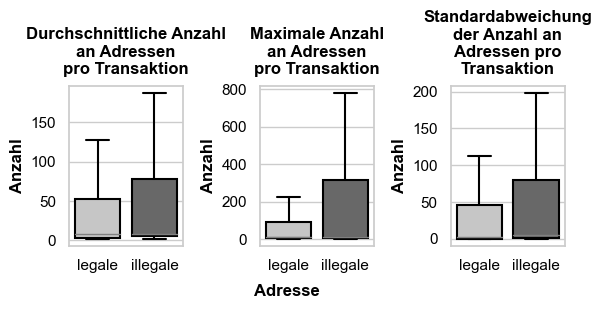

In [169]:
plot_boxplot_fancy(df_ml, ['mean_addresses_per_transaction', 'max_addresses_per_transaction', 'std_addresses_per_transaction'], feature_names_dict, features_y_axis_dict2)